#TALLER 2 AED Y CORRELACIONES MUNICIPIO SANTANDER DE QUILICHAO

In [1]:
#CARGAR ARCHIVO DESDE PC
from google.colab import files
archivo = files.upload()

Saving Clima.csv to Clima.csv


In [2]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.1 MB/s eta 0:00:00


In [3]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.4 MB/s eta 0:00:00


In [4]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import seaborn as sns
import shapely
from shapely import Point, Polygon, LineString
from shapely.geometry import Polygon, LineString, Point
import folium
import mapclassify
import cartopy.crs as ccrs
from scipy.stats import shapiro,pearsonr,spearmanr
from statsmodels.stats.diagnostic import lilliefors



#Análisis Exploratorio de Datos de Clima

# Archivo clima formato csv y visualizacion

In [5]:
Datosclima = pd.read_csv("Clima.csv")
Datosclima

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
0,-75.121691,7.130415,113.776776,255.862711,0.425363,294.603149,2019-06-01,Colombia,Antioquia,Anorí
1,-75.121691,7.130415,132.706988,343.000704,0.428252,294.782715,2019-07-01,Colombia,Antioquia,Anorí
2,-75.121691,7.130415,125.600792,151.470437,0.417310,294.956848,2019-08-01,Colombia,Antioquia,Anorí
3,-75.121691,7.130415,111.806387,303.580844,0.424835,294.434052,2019-09-01,Colombia,Antioquia,Anorí
4,-75.121691,7.130415,95.319894,307.346043,0.428159,293.333862,2019-10-01,Colombia,Antioquia,Anorí
...,...,...,...,...,...,...,...,...,...,...
6034,-76.020006,4.435469,82.988998,77.642618,0.353420,293.764526,2024-02-01,Colombia,Valle del Cauca,Zarzal
6035,-76.020006,4.435469,82.124338,79.474486,0.346959,293.720886,2024-03-01,Colombia,Valle del Cauca,Zarzal
6036,-76.020006,4.435469,90.492691,193.768242,0.387352,293.425598,2024-04-01,Colombia,Valle del Cauca,Zarzal
6037,-76.020006,4.435469,91.878198,218.015282,0.412165,293.525177,2024-05-01,Colombia,Valle del Cauca,Zarzal


In [6]:
len (Datosclima)

6039

In [10]:
Datosclima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         6039 non-null   float64
 1   y                         6039 non-null   float64
 2   Evap_mm_Mes               6039 non-null   float64
 3   Prec_mm_Mes               6039 non-null   float64
 4   HumedadSuelo_FracVol_Mes  6039 non-null   float64
 5   Taire_Kelvin_Mes          6039 non-null   float64
 6   Fecha                     6039 non-null   object 
 7   Pais                      6039 non-null   object 
 8   Dpto                      6039 non-null   object 
 9   Mpio                      6039 non-null   object 
dtypes: float64(6), object(4)
memory usage: 471.9+ KB


In [11]:
#Miremos las fechas
Datosclima.Fecha.head()

,Fecha
0,2019-06-01
1,2019-07-01
2,2019-08-01
3,2019-09-01
4,2019-10-01


In [12]:
Datosclima.Fecha.tail()

,Fecha
6034,2024-02-01
6035,2024-03-01
6036,2024-04-01
6037,2024-05-01
6038,2024-06-01


In [13]:
Datosclima.describe()

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes
count,6039.000000,6039.000000,6039.000000,6039.000000,6039.000000,6039.000000
mean,-74.672533,4.884627,109.623234,218.686133,0.395818,293.855909
std,1.159816,1.420479,24.260755,144.684977,0.036045,5.134294
min,-76.469164,2.638839,41.005077,4.907485,0.189188,281.081177
25%,-75.570848,3.537154,90.593683,107.424470,0.379845,290.056000
50%,-74.672533,4.884627,109.617663,192.177179,0.408194,294.708557
75%,-73.774218,6.232100,127.362546,294.805913,0.422605,298.227020
max,-72.875902,7.130415,194.015450,1077.196858,0.438700,304.543182


In [14]:
#Mostrar los nombres de las variables que contiene el conjunto de datos
Datosclima.columns

Index(['x', 'y', 'Evap_mm_Mes', 'Prec_mm_Mes', 'HumedadSuelo_FracVol_Mes',
       'Taire_Kelvin_Mes', 'Fecha', 'Pais', 'Dpto', 'Mpio'],
      dtype='object')

#Filtros

In [17]:
#Filtrar los departamentos
np.unique(Datosclima.Dpto)

array(['Antioquia', 'Bolívar', 'Boyacá', 'Caldas', 'Caquetá', 'Casanare',
       'Cauca', 'Chocó', 'Cundinamarca', 'Huila', 'Meta', 'Risaralda',
       'Santander', 'Tolima', 'Valle del Cauca'], dtype=object)

In [16]:
#Filtrar los municipios
np.unique(Datosclima.Mpio)

array(['Acacías', 'Albania', 'Algeciras', 'Anorí', 'Ansermanuevo',
       'Aquitania', 'Barranca de Upía', 'Barrancabermeja', 'Betulia',
       'Bolívar', 'Briceño', 'Cajamarca', 'Calima', 'Cantagallo',
       'Cañasgordas', 'Chaparral', 'Chivor', 'Cimitarra',
       'Ciudad Bolívar', 'Colombia', 'Coromoro', 'Cunday', 'Dabeiba',
       'El Calvario', 'El Castillo', 'El Rosal', 'Filadelfia', 'Frontino',
       'Galán', 'Guaduas', 'Guatapé', 'Guatavita', 'Ibagué', 'La Uribe',
       'Landázuri', 'Lebríja', 'Mapiripán', 'Medellín', 'Medina',
       'Mesetas', 'Molagavita', 'Monterrey', 'Murillo', 'Natagaima',
       'Neiva', 'Nobsa', 'Oiba', 'Otanche', 'Palmira', 'Pensilvania',
       'Planadas', 'Pueblo Rico', 'Puerto Concordia', 'Puerto Lleras',
       'Puerto López', 'Puerto Nare', 'Puerto Rico', 'Páez', 'Quibdó',
       'Ramiriquí', 'San Antonio', 'San José del Palmar',
       'San Juan de Río Seco', 'San Luis de Cubarral', 'San Luís',
       'San Martín', 'San Vicente del Caguán', 'S

In [18]:
#Filtrar por Departamento cauca y valle del cauca
Datosclima[Datosclima['Dpto'].str.contains('Cauca')]

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
1830,-76.020006,2.638839,92.000963,115.867922,0.410753,283.657959,2019-06-01,Colombia,Cauca,Páez
1831,-76.020006,2.638839,86.890503,31.350860,0.382519,283.421631,2019-07-01,Colombia,Cauca,Páez
1832,-76.020006,2.638839,76.811093,18.910295,0.343079,283.468658,2019-08-01,Colombia,Cauca,Páez
1833,-76.020006,2.638839,62.841245,70.399484,0.321094,284.528564,2019-09-01,Colombia,Cauca,Páez
1834,-76.020006,2.638839,76.326891,141.656887,0.382547,283.967621,2019-10-01,Colombia,Cauca,Páez
...,...,...,...,...,...,...,...,...,...,...
6034,-76.020006,4.435469,82.988998,77.642618,0.353420,293.764526,2024-02-01,Colombia,Valle del Cauca,Zarzal
6035,-76.020006,4.435469,82.124338,79.474486,0.346959,293.720886,2024-03-01,Colombia,Valle del Cauca,Zarzal
6036,-76.020006,4.435469,90.492691,193.768242,0.387352,293.425598,2024-04-01,Colombia,Valle del Cauca,Zarzal
6037,-76.020006,4.435469,91.878198,218.015282,0.412165,293.525177,2024-05-01,Colombia,Valle del Cauca,Zarzal


In [19]:
#filtrado por Departamento Cauca
Datosclima = Datosclima[Datosclima['Dpto'] == 'Cauca']
Datosclima



,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
1830,-76.020006,2.638839,92.000963,115.867922,0.410753,283.657959,2019-06-01,Colombia,Cauca,Páez
1831,-76.020006,2.638839,86.890503,31.350860,0.382519,283.421631,2019-07-01,Colombia,Cauca,Páez
1832,-76.020006,2.638839,76.811093,18.910295,0.343079,283.468658,2019-08-01,Colombia,Cauca,Páez
1833,-76.020006,2.638839,62.841245,70.399484,0.321094,284.528564,2019-09-01,Colombia,Cauca,Páez
1834,-76.020006,2.638839,76.326891,141.656887,0.382547,283.967621,2019-10-01,Colombia,Cauca,Páez
...,...,...,...,...,...,...,...,...,...,...
2008,-76.469164,2.638839,96.429480,158.004141,0.408050,291.404266,2024-02-01,Colombia,Cauca,Silvia
2009,-76.469164,2.638839,103.428028,183.048909,0.410842,291.590607,2024-03-01,Colombia,Cauca,Silvia
2010,-76.469164,2.638839,104.266785,248.368806,0.422280,291.254059,2024-04-01,Colombia,Cauca,Silvia
2011,-76.469164,2.638839,103.069928,198.080285,0.422718,291.359924,2024-05-01,Colombia,Cauca,Silvia


In [20]:
#Filtrar por Municipio de Santander de Quilichao
Datosclima[Datosclima['Mpio'].str.contains('Santander de Quilichao')]

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
1891,-76.469164,3.087996,116.687357,135.102928,0.416058,293.517975,2019-06-01,Colombia,Cauca,Santander de Quilichao
1892,-76.469164,3.087996,109.520868,62.584679,0.389036,293.298126,2019-07-01,Colombia,Cauca,Santander de Quilichao
1893,-76.469164,3.087996,96.731059,15.315375,0.338251,293.652405,2019-08-01,Colombia,Cauca,Santander de Quilichao
1894,-76.469164,3.087996,79.941517,166.244647,0.348640,293.465790,2019-09-01,Colombia,Cauca,Santander de Quilichao
1895,-76.469164,3.087996,84.820489,206.072660,0.405706,292.530579,2019-10-01,Colombia,Cauca,Santander de Quilichao
...,...,...,...,...,...,...,...,...,...,...
1947,-76.469164,3.087996,95.671177,106.858560,0.395295,294.236389,2024-02-01,Colombia,Cauca,Santander de Quilichao
1948,-76.469164,3.087996,98.260339,116.573683,0.383853,294.367157,2024-03-01,Colombia,Cauca,Santander de Quilichao
1949,-76.469164,3.087996,108.562109,294.063621,0.414849,294.039429,2024-04-01,Colombia,Cauca,Santander de Quilichao
1950,-76.469164,3.087996,102.599681,267.027029,0.425873,294.245361,2024-05-01,Colombia,Cauca,Santander de Quilichao


#Ubicacion Municipio

In [21]:
#Ubicacion del municipio santader de Quilichao en el mapa

# Coordenadas de Santander de Quilichao
y = 3.0096
x = -76.4843

# Crear un mapa centrado en las coordenadas de Santander de Quilichao
mapa_santander_de_quilichao = folium.Map(location=[y, x], zoom_start=12)

# Agregar un marcador en las coordenadas de Santander de Quilichao
folium.Marker([y, x], popup='Santander de Quilichao').add_to(mapa_santander_de_quilichao)

# Mostrar el mapa
mapa_santander_de_quilichao


#Santander_Quilichao_Datosclimagdf

In [22]:

# Filtrar los datos para el municipio de Santander de Quilichao
Santander_Quilichao_Datosclima = Datosclima[Datosclima['Mpio'] == 'Santander de Quilichao']

# Crear un GeoDataFrame con los datos filtrados
Santander_Quilichao_Datosclimagdf = gpd.GeoDataFrame(
    Santander_Quilichao_Datosclima,
    geometry=gpd.points_from_xy(Santander_Quilichao_Datosclima.x, Santander_Quilichao_Datosclima.y),
    crs="EPSG:4326"
)

# Mostrar las primeras filas del GeoDataFrame
Santander_Quilichao_Datosclimagdf.head()


,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio,geometry
1891,-76.469164,3.087996,116.687357,135.102928,0.416058,293.517975,2019-06-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1892,-76.469164,3.087996,109.520868,62.584679,0.389036,293.298126,2019-07-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1893,-76.469164,3.087996,96.731059,15.315375,0.338251,293.652405,2019-08-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1894,-76.469164,3.087996,79.941517,166.244647,0.348640,293.465790,2019-09-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1895,-76.469164,3.087996,84.820489,206.072660,0.405706,292.530579,2019-10-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)


In [23]:
Santander_Quilichao_Datosclimagdf.tail()

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio,geometry
1947,-76.469164,3.087996,95.671177,106.858560,0.395295,294.236389,2024-02-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1948,-76.469164,3.087996,98.260339,116.573683,0.383853,294.367157,2024-03-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1949,-76.469164,3.087996,108.562109,294.063621,0.414849,294.039429,2024-04-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1950,-76.469164,3.087996,102.599681,267.027029,0.425873,294.245361,2024-05-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1951,-76.469164,3.087996,110.973862,168.233887,0.417639,293.579956,2024-06-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)


In [24]:
Santander_Quilichao_Datosclimagdf


,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio,geometry
1891,-76.469164,3.087996,116.687357,135.102928,0.416058,293.517975,2019-06-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1892,-76.469164,3.087996,109.520868,62.584679,0.389036,293.298126,2019-07-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1893,-76.469164,3.087996,96.731059,15.315375,0.338251,293.652405,2019-08-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1894,-76.469164,3.087996,79.941517,166.244647,0.348640,293.465790,2019-09-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1895,-76.469164,3.087996,84.820489,206.072660,0.405706,292.530579,2019-10-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
...,...,...,...,...,...,...,...,...,...,...,...
1947,-76.469164,3.087996,95.671177,106.858560,0.395295,294.236389,2024-02-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1948,-76.469164,3.087996,98.260339,116.573683,0.383853,294.367157,2024-03-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1949,-76.469164,3.087996,108.562109,294.063621,0.414849,294.039429,2024-04-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1950,-76.469164,3.087996,102.599681,267.027029,0.425873,294.245361,2024-05-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)


In [25]:
#Sistemas de coordenadas
Santander_Quilichao_Datosclimagdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
(len(Santander_Quilichao_Datosclimagdf))

61

In [29]:
Santander_Quilichao_Datosclima.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1891 to 1951
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   x                         61 non-null     float64
 1   y                         61 non-null     float64
 2   Evap_mm_Mes               61 non-null     float64
 3   Prec_mm_Mes               61 non-null     float64
 4   HumedadSuelo_FracVol_Mes  61 non-null     float64
 5   Taire_Kelvin_Mes          61 non-null     float64
 6   Fecha                     61 non-null     object 
 7   Pais                      61 non-null     object 
 8   Dpto                      61 non-null     object 
 9   Mpio                      61 non-null     object 
dtypes: float64(6), object(4)
memory usage: 7.3+ KB


In [30]:
#centroides
Santander_Quilichao_Datosclimagdf.insert(11, "centroides" ,Santander_Quilichao_Datosclimagdf.centroid)

<ipython-input-30-f11a93405e8a>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Santander_Quilichao_Datosclimagdf.insert(11, "centroides" ,Santander_Quilichao_Datosclimagdf.centroid)


In [31]:
Santander_Quilichao_Datosclimagdf

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio,geometry,centroides
1891,-76.469164,3.087996,116.687357,135.102928,0.416058,293.517975,2019-06-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800),POINT (-76.46916 3.08800)
1892,-76.469164,3.087996,109.520868,62.584679,0.389036,293.298126,2019-07-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800),POINT (-76.46916 3.08800)
1893,-76.469164,3.087996,96.731059,15.315375,0.338251,293.652405,2019-08-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800),POINT (-76.46916 3.08800)
1894,-76.469164,3.087996,79.941517,166.244647,0.348640,293.465790,2019-09-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800),POINT (-76.46916 3.08800)
1895,-76.469164,3.087996,84.820489,206.072660,0.405706,292.530579,2019-10-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800),POINT (-76.46916 3.08800)
...,...,...,...,...,...,...,...,...,...,...,...,...
1947,-76.469164,3.087996,95.671177,106.858560,0.395295,294.236389,2024-02-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800),POINT (-76.46916 3.08800)
1948,-76.469164,3.087996,98.260339,116.573683,0.383853,294.367157,2024-03-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800),POINT (-76.46916 3.08800)
1949,-76.469164,3.087996,108.562109,294.063621,0.414849,294.039429,2024-04-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800),POINT (-76.46916 3.08800)
1950,-76.469164,3.087996,102.599681,267.027029,0.425873,294.245361,2024-05-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800),POINT (-76.46916 3.08800)


In [32]:
#ubicacion de la estacion en santander de Quilichao
Santander_Quilichao_Datosclima = Datosclima[Datosclima['Mpio'] == 'Santander de Quilichao']
Santander_Quilichao_Datosclimagdf.explore()

In [33]:
Santander_Quilichao_Datosclima = Datosclima

In [34]:
# Filtrar los datos para el municipio de Santander de Quilichao
Santander_Quilichao_Datosclima = Datosclima[Datosclima['Mpio'] == 'Santander de Quilichao']
# Agrupar por fecha y calcular el promedio de cada variable numérica
promedios_por_fecha = Santander_Quilichao_Datosclima.groupby(['Fecha']).mean(numeric_only=True)

# Mostrar el DataFrame resultante
promedios_por_fecha

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes
Fecha,,,,,,
2019-06-01,-76.469164,3.087996,116.687357,135.102928,0.416058,293.517975
2019-07-01,-76.469164,3.087996,109.520868,62.584679,0.389036,293.298126
2019-08-01,-76.469164,3.087996,96.731059,15.315375,0.338251,293.652405
2019-09-01,-76.469164,3.087996,79.941517,166.244647,0.348640,293.465790
2019-10-01,-76.469164,3.087996,84.820489,206.072660,0.405706,292.530579
...,...,...,...,...,...,...
2024-02-01,-76.469164,3.087996,95.671177,106.858560,0.395295,294.236389
2024-03-01,-76.469164,3.087996,98.260339,116.573683,0.383853,294.367157
2024-04-01,-76.469164,3.087996,108.562109,294.063621,0.414849,294.039429


#INDEX FECHA - X- Y

In [35]:
# Filtrar los datos para el municipio de Santander de Quilichao
Santander_Quilichao_Datosclima = Datosclima[Datosclima['Mpio'] == 'Santander de Quilichao']
# Establecer el índice con las columnas 'x', 'y' y 'Fecha'
Datos_index = Santander_Quilichao_Datosclima.set_index(["x", "y", "Fecha"])

# Mostrar las primeras 5 filas del DataFrame resultante
Datos_index.head(5)

Evap_mm_Mes  Prec_mm_Mes  \
x          y        Fecha                                  
-76.469164 3.087996 2019-06-01   116.687357   135.102928   
                    2019-07-01   109.520868    62.584679   
                    2019-08-01    96.731059    15.315375   
                    2019-09-01    79.941517   166.244647   
                    2019-10-01    84.820489   206.072660   

                                HumedadSuelo_FracVol_Mes  Taire_Kelvin_Mes  \
x          y        Fecha                                                    
-76.469164 3.087996 2019-06-01                  0.416058        293.517975   
                    2019-07-01                  0.389036        293.298126   
                    2019-08-01                  0.338251        293.652405   
                    2019-09-01                  0.348640        293.465790   
                    2019-10-01                  0.405706        292.530579   

                                    Pais   Dpto                    Mpio  
x          y        Fecha                                                
-76.469164 3.087996 2019-06-01  Colombia  Cauca  Santander de Quilichao  
                    2019-07-01  Colombia  Cauca  Santander de Quilichao  
                    2019-08-01  Colombia  Cauca  Santander de Quilichao  
                    2019-09-01  Colombia  Cauca  Santander de Quilichao  
                    2019-10-01  Colombia  Cauca  Santander de Quilichao

In [36]:
#los datos tomando como referencia el primer índice (x)
Datos_index.groupby(level=0).mean(numeric_only = True)

,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes
x,,,,
-76.469164,103.900456,193.573586,0.407728,293.174869


In [37]:
#los datos tomando como referencia el índice Fecha
Datos_index.groupby(level="Fecha").max()

,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Pais,Dpto,Mpio
Fecha,,,,,,,
2019-06-01,116.687357,135.102928,0.416058,293.517975,Colombia,Cauca,Santander de Quilichao
2019-07-01,109.520868,62.584679,0.389036,293.298126,Colombia,Cauca,Santander de Quilichao
2019-08-01,96.731059,15.315375,0.338251,293.652405,Colombia,Cauca,Santander de Quilichao
2019-09-01,79.941517,166.244647,0.348640,293.465790,Colombia,Cauca,Santander de Quilichao
2019-10-01,84.820489,206.072660,0.405706,292.530579,Colombia,Cauca,Santander de Quilichao
...,...,...,...,...,...,...,...
2024-02-01,95.671177,106.858560,0.395295,294.236389,Colombia,Cauca,Santander de Quilichao
2024-03-01,98.260339,116.573683,0.383853,294.367157,Colombia,Cauca,Santander de Quilichao
2024-04-01,108.562109,294.063621,0.414849,294.039429,Colombia,Cauca,Santander de Quilichao


In [38]:
#fitro valor maximo
Datos_index.groupby(level=['x','y']).max()

,,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Pais,Dpto,Mpio
x,y,,,,,,,
-76.469164,3.087996,130.121833,437.955304,0.429824,294.551239,Colombia,Cauca,Santander de Quilichao


In [40]:
#También podemos optar por incluir NA en las claves de grupo o no configurando el parámetro dropna, la configuración predeterminada es Verdadero
Datos_index.groupby(by=["Fecha"], dropna=False).max()

,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Pais,Dpto,Mpio
Fecha,,,,,,,
2019-06-01,116.687357,135.102928,0.416058,293.517975,Colombia,Cauca,Santander de Quilichao
2019-07-01,109.520868,62.584679,0.389036,293.298126,Colombia,Cauca,Santander de Quilichao
2019-08-01,96.731059,15.315375,0.338251,293.652405,Colombia,Cauca,Santander de Quilichao
2019-09-01,79.941517,166.244647,0.348640,293.465790,Colombia,Cauca,Santander de Quilichao
2019-10-01,84.820489,206.072660,0.405706,292.530579,Colombia,Cauca,Santander de Quilichao
...,...,...,...,...,...,...,...
2024-02-01,95.671177,106.858560,0.395295,294.236389,Colombia,Cauca,Santander de Quilichao
2024-03-01,98.260339,116.573683,0.383853,294.367157,Colombia,Cauca,Santander de Quilichao
2024-04-01,108.562109,294.063621,0.414849,294.039429,Colombia,Cauca,Santander de Quilichao


#CONVERSION DE GRADOS KELVIN A CELSIUS E INSERTAR COLUMNA CELSIUS

In [41]:
#Funciones lamda, pasaremos las temperaturas en Kelvin a Celsius
Datos_index.groupby("Prec_mm_Mes", group_keys=True)[['Taire_Kelvin_Mes']].apply(lambda x: x-273)

,,,,Taire_Kelvin_Mes
Prec_mm_Mes,x,y,Fecha,
15.315375,-76.469164,3.087996,2019-08-01,20.652405
62.584679,-76.469164,3.087996,2019-07-01,20.298126
67.519592,-76.469164,3.087996,2024-01-01,21.551239
86.404376,-76.469164,3.087996,2021-01-01,19.809662
86.853246,-76.469164,3.087996,2020-09-01,20.225037
...,...,...,...,...
331.330732,-76.469164,3.087996,2021-10-01,20.036346
345.465613,-76.469164,3.087996,2022-11-01,19.242279
360.615802,-76.469164,3.087996,2023-03-01,19.633759


In [42]:
Santander_Quilichao_Datosclima.insert(3,"Taire_celsius_Mes",Santander_Quilichao_Datosclima['Taire_Kelvin_Mes']-273.3)


In [43]:
Santander_Quilichao_Datosclima

,x,y,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
1891,-76.469164,3.087996,116.687357,20.217975,135.102928,0.416058,293.517975,2019-06-01,Colombia,Cauca,Santander de Quilichao
1892,-76.469164,3.087996,109.520868,19.998126,62.584679,0.389036,293.298126,2019-07-01,Colombia,Cauca,Santander de Quilichao
1893,-76.469164,3.087996,96.731059,20.352405,15.315375,0.338251,293.652405,2019-08-01,Colombia,Cauca,Santander de Quilichao
1894,-76.469164,3.087996,79.941517,20.165790,166.244647,0.348640,293.465790,2019-09-01,Colombia,Cauca,Santander de Quilichao
1895,-76.469164,3.087996,84.820489,19.230579,206.072660,0.405706,292.530579,2019-10-01,Colombia,Cauca,Santander de Quilichao
...,...,...,...,...,...,...,...,...,...,...,...
1947,-76.469164,3.087996,95.671177,20.936389,106.858560,0.395295,294.236389,2024-02-01,Colombia,Cauca,Santander de Quilichao
1948,-76.469164,3.087996,98.260339,21.067157,116.573683,0.383853,294.367157,2024-03-01,Colombia,Cauca,Santander de Quilichao
1949,-76.469164,3.087996,108.562109,20.739429,294.063621,0.414849,294.039429,2024-04-01,Colombia,Cauca,Santander de Quilichao
1950,-76.469164,3.087996,102.599681,20.945361,267.027029,0.425873,294.245361,2024-05-01,Colombia,Cauca,Santander de Quilichao


In [ ]:
#NO CORRER CODIGO
#eliminacion de colunma Taire_Kelvin_Mes ya que fue creada y convertida en celsius
Santander_Quilichao_Datosclima = Santander_Quilichao_Datosclima.drop(columns=['Taire_Kelvin_Mes'])
Santander_Quilichao_Datosclima

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Fecha,Pais,Dpto,Mpio
1891,-76.469164,3.087996,116.687357,135.102928,0.416058,2019-06-01,Colombia,Cauca,Santander de Quilichao
1892,-76.469164,3.087996,109.520868,62.584679,0.389036,2019-07-01,Colombia,Cauca,Santander de Quilichao
1893,-76.469164,3.087996,96.731059,15.315375,0.338251,2019-08-01,Colombia,Cauca,Santander de Quilichao
1894,-76.469164,3.087996,79.941517,166.244647,0.348640,2019-09-01,Colombia,Cauca,Santander de Quilichao
1895,-76.469164,3.087996,84.820489,206.072660,0.405706,2019-10-01,Colombia,Cauca,Santander de Quilichao
...,...,...,...,...,...,...,...,...,...
1947,-76.469164,3.087996,95.671177,106.858560,0.395295,2024-02-01,Colombia,Cauca,Santander de Quilichao
1948,-76.469164,3.087996,98.260339,116.573683,0.383853,2024-03-01,Colombia,Cauca,Santander de Quilichao
1949,-76.469164,3.087996,108.562109,294.063621,0.414849,2024-04-01,Colombia,Cauca,Santander de Quilichao
1950,-76.469164,3.087996,102.599681,267.027029,0.425873,2024-05-01,Colombia,Cauca,Santander de Quilichao


#TRANSFORMACION DE DATOS FECHA A FORMATO DATETIME

In [44]:
#Asignar formato de fecha a la variable Fecha
Santander_Quilichao_Datosclima["Fecha"] = pd.to_datetime(Santander_Quilichao_Datosclima["Fecha"])

<ipython-input-44-622e4a196e73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Santander_Quilichao_Datosclima["Fecha"] = pd.to_datetime(Santander_Quilichao_Datosclima["Fecha"])


In [45]:
Santander_Quilichao_Datosclima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1891 to 1951
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   x                         61 non-null     float64       
 1   y                         61 non-null     float64       
 2   Evap_mm_Mes               61 non-null     float64       
 3   Taire_celsius_Mes         61 non-null     float64       
 4   Prec_mm_Mes               61 non-null     float64       
 5   HumedadSuelo_FracVol_Mes  61 non-null     float64       
 6   Taire_Kelvin_Mes          61 non-null     float64       
 7   Fecha                     61 non-null     datetime64[ns]
 8   Pais                      61 non-null     object        
 9   Dpto                      61 non-null     object        
 10  Mpio                      61 non-null     object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 7.8+ KB


#INSERTAR COLUMNAS DE AÑO, MES, DIA

In [47]:
# Crear una variable que se llame año e insertarla en el dataframe
Santander_Quilichao_Datosclima.insert(8,"Año",Santander_Quilichao_Datosclima.Fecha.dt.year)

In [48]:
# Crear una variable que se llame año
Santander_Quilichao_Datosclima.insert(9,"Mes",Santander_Quilichao_Datosclima.Fecha.dt.month)

In [49]:
# Crear una variable que se llame año
Santander_Quilichao_Datosclima.insert(10,"Día",Santander_Quilichao_Datosclima.Fecha.dt.day)

#VISUALIZACION DE LAS COLUMNAS AÑO, MES, DIA

In [50]:
Santander_Quilichao_Datosclima.head()

,x,y,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Año,Mes,Día,Pais,Dpto,Mpio
1891,-76.469164,3.087996,116.687357,20.217975,135.102928,0.416058,293.517975,2019-06-01,2019,6,1,Colombia,Cauca,Santander de Quilichao
1892,-76.469164,3.087996,109.520868,19.998126,62.584679,0.389036,293.298126,2019-07-01,2019,7,1,Colombia,Cauca,Santander de Quilichao
1893,-76.469164,3.087996,96.731059,20.352405,15.315375,0.338251,293.652405,2019-08-01,2019,8,1,Colombia,Cauca,Santander de Quilichao
1894,-76.469164,3.087996,79.941517,20.165790,166.244647,0.348640,293.465790,2019-09-01,2019,9,1,Colombia,Cauca,Santander de Quilichao
1895,-76.469164,3.087996,84.820489,19.230579,206.072660,0.405706,292.530579,2019-10-01,2019,10,1,Colombia,Cauca,Santander de Quilichao


####CREAR SANTANDER FINAL PARA VISUALIZAR SOLAMENTE LOS AÑOS 2020,2021,2022, 2023 DEBIDO A QUE SE EXCLUYERON LOS AÑOS 2019 Y 2024 PARA EL ANALISIS DEBIDO A QUE LOS DATOS ESTABAN INCOMPLETOS

In [209]:
SantanderFinal= Santander_Quilichao_Datosclima[Santander_Quilichao_Datosclima['Fecha'].dt.year.isin([2020,2021,2022, 2023])]
SantanderFinal

,x,y,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Año,Mes,Día,Pais,Dpto,Mpio
1898,-76.469164,3.087996,112.900772,20.077869,130.572881,0.406248,293.377869,2020-01-01,2020,1,1,Colombia,Cauca,Santander de Quilichao
1899,-76.469164,3.087996,105.246336,20.596423,141.882114,0.391496,293.896423,2020-02-01,2020,2,1,Colombia,Cauca,Santander de Quilichao
1900,-76.469164,3.087996,104.162918,20.022906,130.661388,0.409376,293.322906,2020-03-01,2020,3,1,Colombia,Cauca,Santander de Quilichao
1901,-76.469164,3.087996,107.924769,20.150500,237.297521,0.417379,293.450500,2020-04-01,2020,4,1,Colombia,Cauca,Santander de Quilichao
1902,-76.469164,3.087996,103.536686,20.720721,172.356582,0.415807,294.020721,2020-05-01,2020,5,1,Colombia,Cauca,Santander de Quilichao
1903,-76.469164,3.087996,110.121366,19.932117,88.911312,0.410018,293.232117,2020-06-01,2020,6,1,Colombia,Cauca,Santander de Quilichao
1904,-76.469164,3.087996,109.249360,19.594348,142.535211,0.405733,292.894348,2020-07-01,2020,7,1,Colombia,Cauca,Santander de Quilichao
1905,-76.469164,3.087996,110.034076,19.810474,132.117070,0.387678,293.110474,2020-08-01,2020,8,1,Colombia,Cauca,Santander de Quilichao
1906,-76.469164,3.087996,96.320313,19.925037,86.853246,0.391893,293.225037,2020-09-01,2020,9,1,Colombia,Cauca,Santander de Quilichao
1907,-76.469164,3.087996,95.454210,19.944720,205.348256,0.403949,293.244720,2020-10-01,2020,10,1,Colombia,Cauca,Santander de Quilichao


In [61]:
SantanderFinal[['Año','Evap_mm_Mes','Taire_celsius_Mes','Prec_mm_Mes','HumedadSuelo_FracVol_Mes']].max()

,0
Año,2023.000000
Evap_mm_Mes,130.121833
Taire_celsius_Mes,21.115100
Prec_mm_Mes,437.955304
HumedadSuelo_FracVol_Mes,0.429824


In [58]:
SantanderFinal[['Año','Evap_mm_Mes','Taire_celsius_Mes','Prec_mm_Mes','HumedadSuelo_FracVol_Mes']].min()

,0
Año,2020.000000
Evap_mm_Mes,80.284143
Taire_celsius_Mes,18.502368
Prec_mm_Mes,86.404376
HumedadSuelo_FracVol_Mes,0.374325


In [76]:
(len(SantanderFinal))

48

<Figure size 1000x600 with 0 Axes>

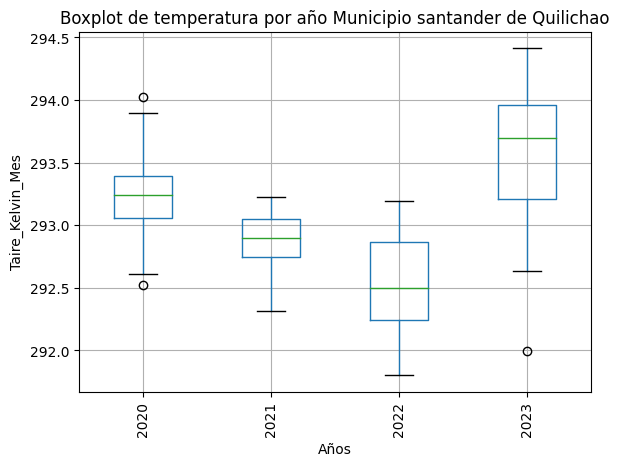

In [70]:
#Grafica Boxplot Prec_mm_Mes
plt.figure(figsize=(10, 6))
SantanderFinal.reset_index().boxplot(column="Taire_Kelvin_Mes",by="Año")
plt.xticks(rotation =90)
plt.title("Boxplot de temperatura por año Municipio santander de Quilichao")
plt.ylabel("Taire_Kelvin_Mes")
plt.xlabel("Años")
plt.suptitle("")
plt.savefig("boxplot_temperatura.png")
plt.show()

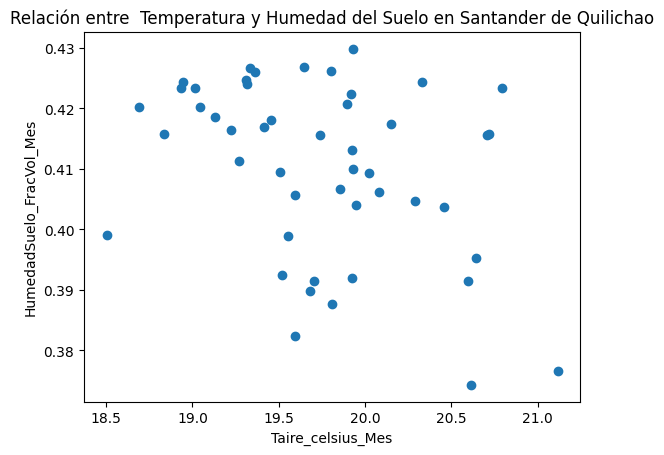

In [71]:
# Graficar dos variables del municipio de Santander de Quilichao
# Relación HumedadSuelo_FracVol_Mes y Taire_celsius_Mes

# Crear el gráfico de dispersión
plt.scatter(SantanderFinal['Taire_celsius_Mes'], SantanderFinal['HumedadSuelo_FracVol_Mes'])

# Agregar etiquetas y título
plt.xlabel('Taire_celsius_Mes')
plt.ylabel('HumedadSuelo_FracVol_Mes')
plt.title('Relación entre  Temperatura y Humedad del Suelo en Santander de Quilichao')
plt.savefig("boxplot_relacion Temperatura y Humedad del suelo.png")
# Mostrar el gráfico
plt.show()

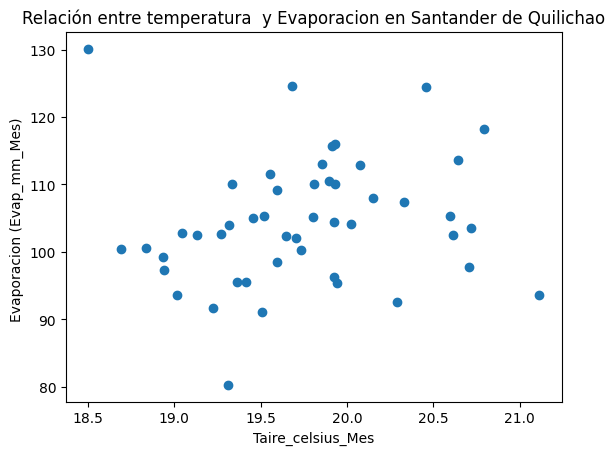

In [72]:
# Graficar dos variables del municipio de Santander de Quilichao
# Relación temperatura y Evap_mm_Mes

# Crear el gráfico de dispersión
plt.scatter(SantanderFinal['Taire_celsius_Mes'], SantanderFinal['Evap_mm_Mes'])

# Agregar etiquetas y título
plt.xlabel('Taire_celsius_Mes')
plt.ylabel('Evaporacion (Evap_mm_Mes) ')
plt.title('Relación entre temperatura  y Evaporacion en Santander de Quilichao')
plt.savefig("boxplot_relacion Temperatura y Evaporacion.png")
# Mostrar el gráfico
plt.show()

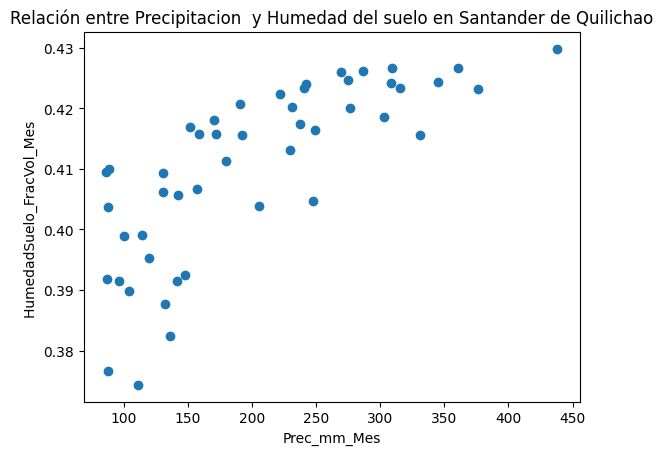

In [73]:
# Graficar dos variables del municipio de Santander de Quilichao
# Relación precipitacion y humedad

# Crear el gráfico de dispersión
plt.scatter(SantanderFinal['Prec_mm_Mes'],SantanderFinal['HumedadSuelo_FracVol_Mes'])

# Agregar etiquetas y título
plt.xlabel('Prec_mm_Mes')
plt.ylabel('HumedadSuelo_FracVol_Mes ')
plt.title('Relación entre Precipitacion  y Humedad del suelo en Santander de Quilichao')
plt.savefig("boxplot_relacion Precipitacion  y Humedad del suelo .png")
# Mostrar el gráfico
plt.show()

# SantanderFinalvisible FILTRO PARA REALIZAR ANALISIS

In [210]:
#CODIGO FILTRADO PARA TALLER 2
SantanderFinalvisible= SantanderFinal[['x','y','Evap_mm_Mes','Taire_celsius_Mes',	'Prec_mm_Mes',	'HumedadSuelo_FracVol_Mes',	'Fecha',	'Año',	'Mes',	'Día',	'Pais',	'Dpto',	'Mpio']]
SantanderFinalvisible

,x,y,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Fecha,Año,Mes,Día,Pais,Dpto,Mpio
1898,-76.469164,3.087996,112.900772,20.077869,130.572881,0.406248,2020-01-01,2020,1,1,Colombia,Cauca,Santander de Quilichao
1899,-76.469164,3.087996,105.246336,20.596423,141.882114,0.391496,2020-02-01,2020,2,1,Colombia,Cauca,Santander de Quilichao
1900,-76.469164,3.087996,104.162918,20.022906,130.661388,0.409376,2020-03-01,2020,3,1,Colombia,Cauca,Santander de Quilichao
1901,-76.469164,3.087996,107.924769,20.150500,237.297521,0.417379,2020-04-01,2020,4,1,Colombia,Cauca,Santander de Quilichao
1902,-76.469164,3.087996,103.536686,20.720721,172.356582,0.415807,2020-05-01,2020,5,1,Colombia,Cauca,Santander de Quilichao
1903,-76.469164,3.087996,110.121366,19.932117,88.911312,0.410018,2020-06-01,2020,6,1,Colombia,Cauca,Santander de Quilichao
1904,-76.469164,3.087996,109.249360,19.594348,142.535211,0.405733,2020-07-01,2020,7,1,Colombia,Cauca,Santander de Quilichao
1905,-76.469164,3.087996,110.034076,19.810474,132.117070,0.387678,2020-08-01,2020,8,1,Colombia,Cauca,Santander de Quilichao
1906,-76.469164,3.087996,96.320313,19.925037,86.853246,0.391893,2020-09-01,2020,9,1,Colombia,Cauca,Santander de Quilichao
1907,-76.469164,3.087996,95.454210,19.944720,205.348256,0.403949,2020-10-01,2020,10,1,Colombia,Cauca,Santander de Quilichao


In [211]:
len(SantanderFinalvisible)

48

####GRAFICOS BOXPLOT DE LAS VARIABLES Evap_mm_Mes','Taire_celsius_Mes',	'Prec_mm_Mes',	'HumedadSuelo_FracVol_Mes

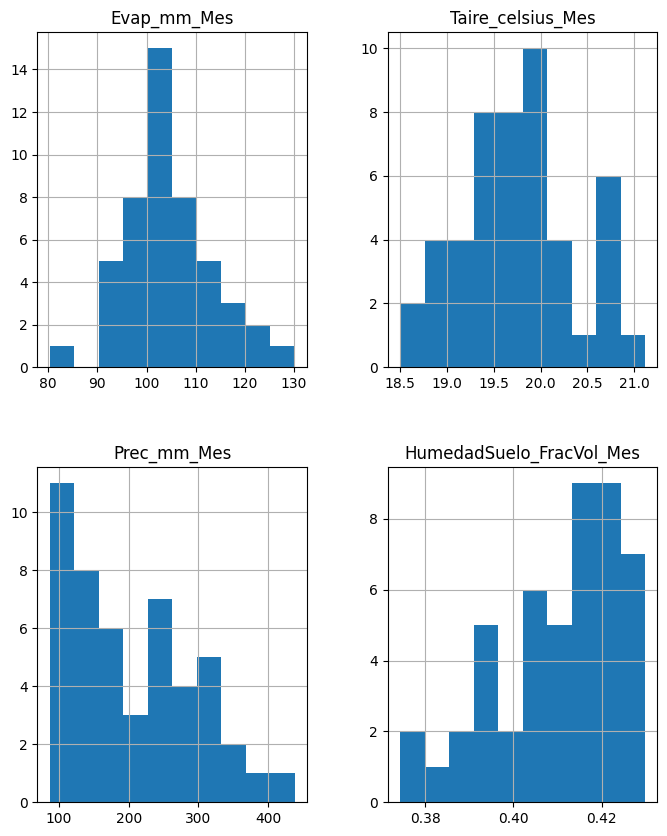

In [161]:
columnas_visibles = ['Evap_mm_Mes', 'Taire_celsius_Mes', 'Prec_mm_Mes', 'HumedadSuelo_FracVol_Mes']

SantanderFinalhistograma = SantanderFinalvisible[columnas_visibles]

SantanderFinalhistograma.hist(figsize=(8,10))
plt.savefig("Histograma variables.png")
plt.show()

In [212]:
SantanderFinalvisible.describe()

,x,y,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Fecha,Año,Mes,Día
count,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48,48.000000,48.000000,48.0
mean,-76.469164,3.087996e+00,104.523516,19.745409,202.495365,0.410247,2021-12-15 23:00:00,2021.500000,6.500000,1.0
min,-76.469164,3.087996e+00,80.284143,18.502368,86.404376,0.374325,2020-01-01 00:00:00,2020.000000,1.000000,1.0
25%,-76.469164,3.087996e+00,98.336371,19.329692,130.639261,0.402537,2020-12-24 06:00:00,2020.750000,3.750000,1.0
50%,-76.469164,3.087996e+00,103.727570,19.720615,185.412741,0.415623,2021-12-16 12:00:00,2021.500000,6.500000,1.0
75%,-76.469164,3.087996e+00,110.105800,20.036647,270.519872,0.422542,2022-12-08 18:00:00,2022.250000,9.250000,1.0
max,-76.469164,3.087996e+00,130.121833,21.115100,437.955304,0.429824,2023-12-01 00:00:00,2023.000000,12.000000,1.0
std,0.000000,4.487887e-16,9.476087,0.594860,90.535621,0.014363,NaN,1.129865,3.488583,0.0


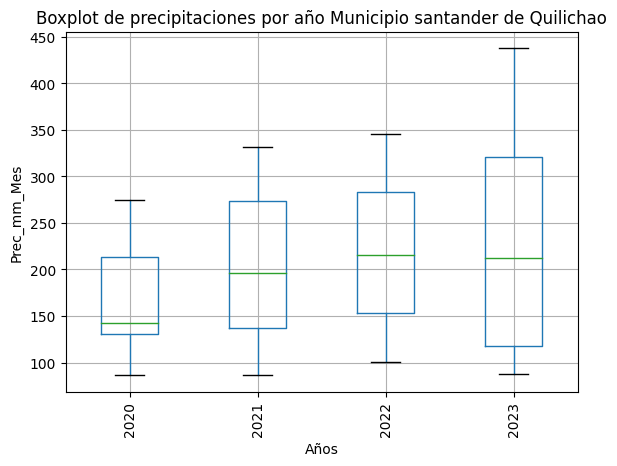

In [163]:
#Grafica Boxplot Prec_mm_Mes
SantanderFinalvisible.reset_index().boxplot(column="Prec_mm_Mes",by="Año")
plt.xticks(rotation =90)
plt.title("Boxplot de precipitaciones por año Municipio santander de Quilichao")
plt.ylabel("Prec_mm_Mes")
plt.xlabel("Años")
plt.suptitle("")
plt.savefig("Boxplot_Precipitaciones.png")
plt.show()

<Figure size 1000x600 with 0 Axes>

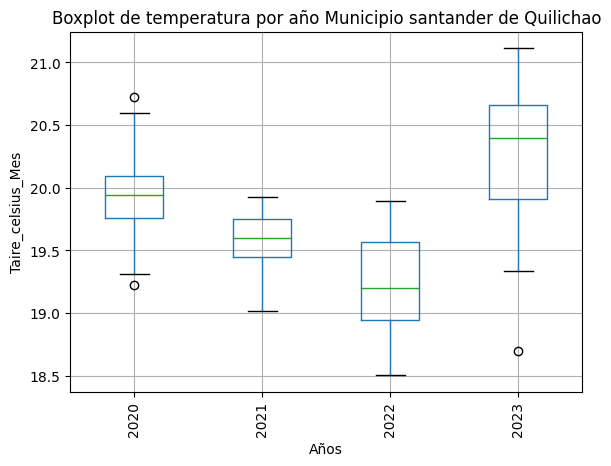

In [134]:
#Grafica Boxplot Prec_mm_Mes
plt.figure(figsize=(10, 6))
SantanderFinalvisible.reset_index().boxplot(column="Taire_celsius_Mes",by="Año")
plt.xticks(rotation =90)
plt.title("Boxplot de temperatura por año Municipio santander de Quilichao")
plt.ylabel("Taire_celsius_Mes")
plt.xlabel("Años")
plt.suptitle("")
plt.savefig("Boxplot_Temperatura.png")
plt.show()

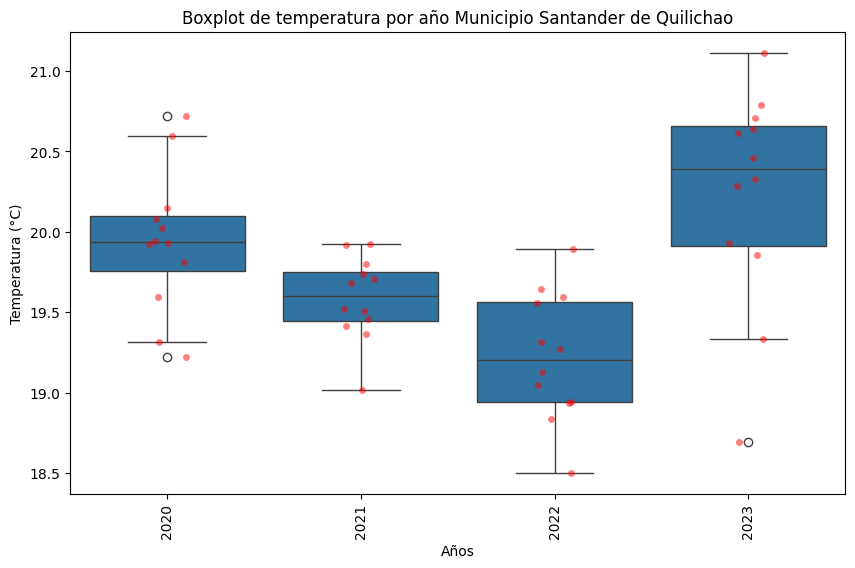

In [135]:
#PRUEBA DE GRAFICO
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="Año", y="Taire_celsius_Mes", data=SantanderFinalvisible)
sns.stripplot(x="Año", y="Taire_celsius_Mes", data=SantanderFinalvisible, color='red', alpha=0.5, jitter=True)
plt.xticks(rotation=90)
plt.title("Boxplot de temperatura por año Municipio Santander de Quilichao")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Años")
plt.show()

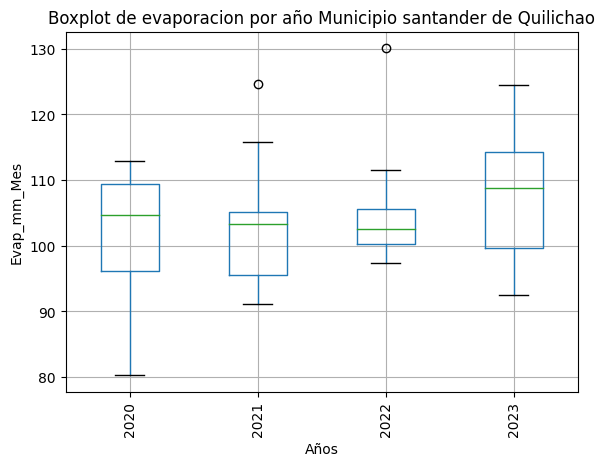

In [136]:
#Grafica Boxplot Evap_mm_Mes
SantanderFinalvisible.reset_index().boxplot(column="Evap_mm_Mes",by="Año")
plt.xticks(rotation =90)
plt.title("Boxplot de evaporacion por año Municipio santander de Quilichao")
plt.ylabel("Evap_mm_Mes")
plt.xlabel("Años")
plt.suptitle("")
plt.savefig("Boxplot_Evaporacion.png")
plt.show()

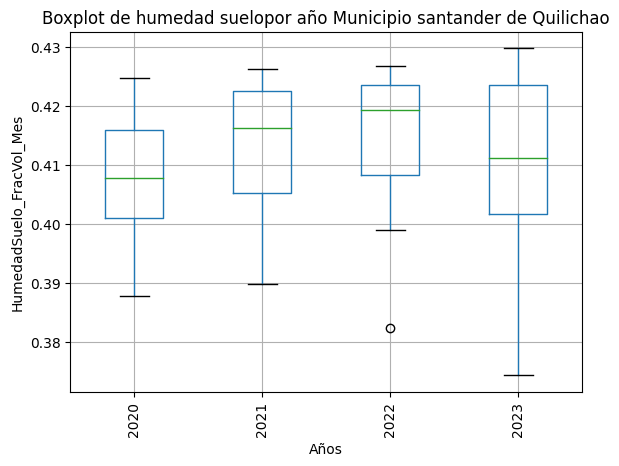

In [137]:
#Grafica Boxplot humedad del suelo
SantanderFinalvisible.reset_index().boxplot(column="HumedadSuelo_FracVol_Mes",by="Año")
plt.xticks(rotation =90)
plt.title("Boxplot de humedad suelopor año Municipio santander de Quilichao")
plt.ylabel("HumedadSuelo_FracVol_Mes")
plt.xlabel("Años")
plt.suptitle("")
plt.savefig("Boxplot_Humedad suelo.png")
plt.show()

#CALCULO CORRELACIONES

In [94]:
#calculo de correlaciones spearman
corr_s=SantanderFinalvisible.corr(method='spearman')
corr_s

,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes
Evap_mm_Mes,1.000000,0.272688,-0.156752,-0.089883
Taire_celsius_Mes,0.272688,1.000000,-0.254776,-0.344659
Prec_mm_Mes,-0.156752,-0.254776,1.000000,0.825988
HumedadSuelo_FracVol_Mes,-0.089883,-0.344659,0.825988,1.000000


In [95]:
#calculo de correlaciones pearson
corr_p=SantanderFinalvisible.corr(method='pearson')
corr_p

,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes
Evap_mm_Mes,1.000000,0.137132,-0.141110,-0.114547
Taire_celsius_Mes,0.137132,1.000000,-0.203105,-0.361479
Prec_mm_Mes,-0.141110,-0.203105,1.000000,0.759479
HumedadSuelo_FracVol_Mes,-0.114547,-0.361479,0.759479,1.000000


In [109]:
corr_p['Taire_celsius_Mes'].sort_values(ascending=False)


,Taire_celsius_Mes
Taire_celsius_Mes,1.000000
Evap_mm_Mes,0.137132
Prec_mm_Mes,-0.203105
HumedadSuelo_FracVol_Mes,-0.361479


In [140]:
SantanderFinalvisible.plot

#PRUEBA DE NORMALIDAD

In [100]:
variable1= SantanderFinalvisible['Taire_celsius_Mes']
variable2= SantanderFinalvisible['Evap_mm_Mes']
variable3= SantanderFinalvisible['Prec_mm_Mes']
variable4= SantanderFinalvisible['HumedadSuelo_FracVol_Mes']
datos1 =[[variable1,variable2,variable3,variable4]]

In [101]:
# crear dicionario para el  DataFrame
data_dict = {'Taire_celsius_Mes': variable1,
             'Evap_mm_Mes': variable2,
             'Prec_mm_Mes': variable3,
             'HumedadSuelo_FracVol_Mes': variable4}

In [102]:
#prueba de normalidad
# Crear un DataFrame a partir del diccionario
datos1 = pd.DataFrame(data_dict)
for columna in datos1.columns:
    stat,p=shapiro(datos1[columna])
    print(f'{columna}:estadistico={stat:3f},p-value={p:3f}')
    if p>0.05:
        print(f'{columna}sigue distribucion normal,s utiliza la correlacion de pearson')
    else:
        print(f'{columna}no sigue la distribucion normal,se utiliza la correlacion de spearman')

Taire_celsius_Mes:estadistico=0.984925,p-value=0.788129
Taire_celsius_Messigue distribucion normal,s utiliza la correlacion de pearson
Evap_mm_Mes:estadistico=0.977697,p-value=0.486695
Evap_mm_Messigue distribucion normal,s utiliza la correlacion de pearson
Prec_mm_Mes:estadistico=0.940242,p-value=0.016581
Prec_mm_Mesno sigue la distribucion normal,se utiliza la correlacion de spearman
HumedadSuelo_FracVol_Mes:estadistico=0.917401,p-value=0.002410
HumedadSuelo_FracVol_Mesno sigue la distribucion normal,se utiliza la correlacion de spearman


# PRUEBA DE CORRELACION

In [148]:
#CALCULAR CORRELACION DE PEARSON
corr,p=pearsonr(datos1['Taire_celsius_Mes'],datos1['Evap_mm_Mes'])
print(f'coeficiente de correlacion de pearson{corr:3f},p-value={p:3f}')

coeficiente de correlacion de pearson0.137132,p-value=0.352663


<Figure size 1000x600 with 0 Axes>

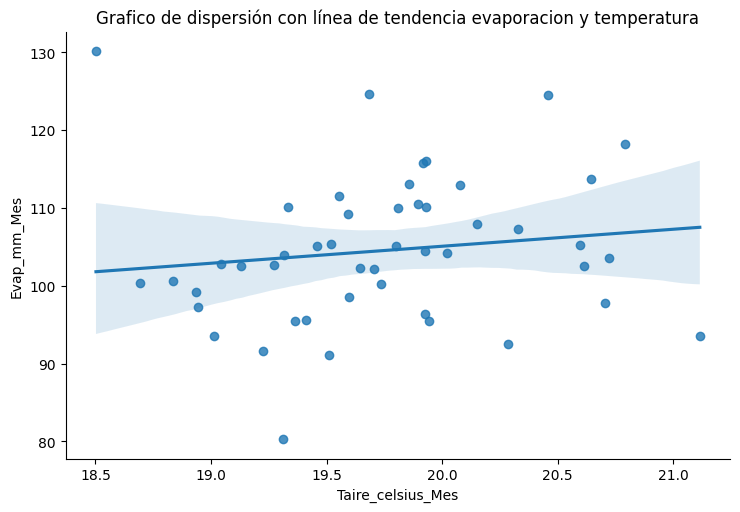

In [104]:
#GRAFICO DE DISPERSION CON LINEA DE TENDENCIA

plt.figure(figsize=(10, 6))
sns.lmplot(x='Taire_celsius_Mes',y='Evap_mm_Mes',data=SantanderFinalvisible,height=5,aspect=1.5)
plt.title('Grafico de dispersión con línea de tendencia evaporacion y temperatura')
plt.savefig("Grafico de dispersión con línea de tendencia.png")
plt.show()

#CALCULO CORRELACION OTRA OPCION

In [149]:
#CALCULAR CORRELACION SPEARMAN
corr,p=spearmanr(datos1['Prec_mm_Mes'],datos1['HumedadSuelo_FracVol_Mes'])
print(f'coeficiente de correlacion de spearman{corr:3f},p-value={p:3f}')

coeficiente de correlacion de spearman0.825988,p-value=0.000000


<Figure size 1000x600 with 0 Axes>

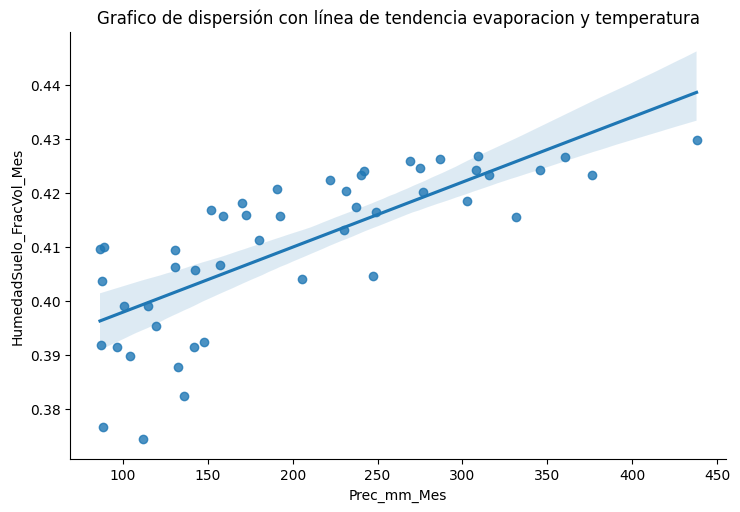

In [106]:
#GRAFICO DE DISPERSION CON LINEA DE TENDENCIA


plt.figure(figsize=(10, 6))
sns.lmplot(x='Prec_mm_Mes',y='HumedadSuelo_FracVol_Mes',data=SantanderFinalvisible,height=5,aspect=1.5)
plt.title('Grafico de dispersión con línea de tendencia evaporacion y temperatura')
plt.savefig("Grafico de dispersión con línea de tendencia2.png")
plt.show()

#EXPLORARCION GRAFICO PAIR PLOT VER COMPORTAMIENTO

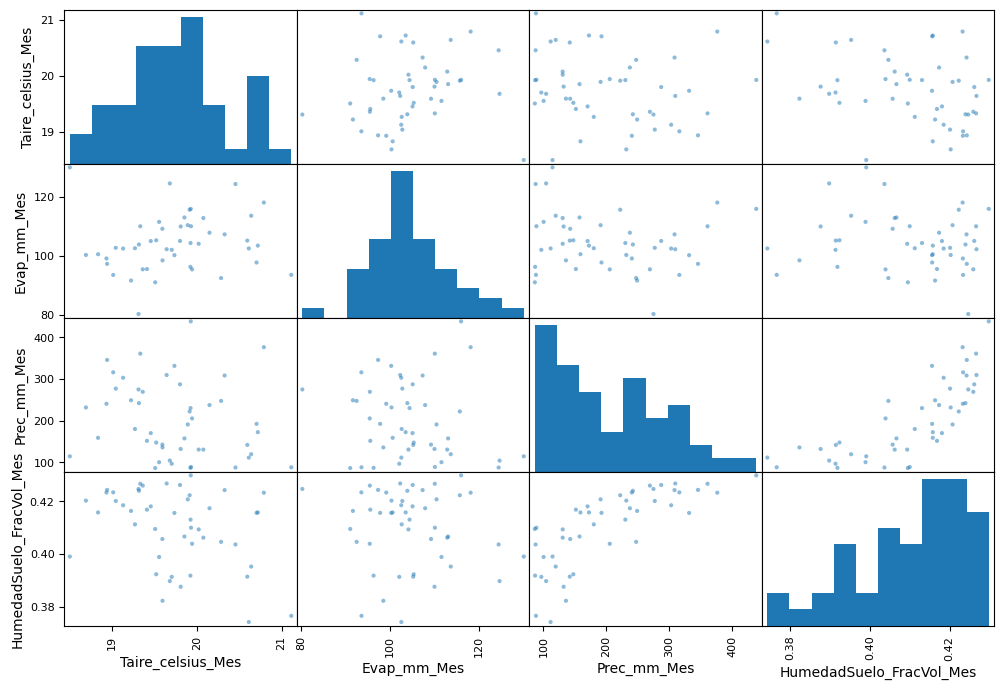

In [141]:
from pandas.plotting import scatter_matrix
atributos=['Taire_celsius_Mes', 'Evap_mm_Mes', 'Prec_mm_Mes', 'HumedadSuelo_FracVol_Mes']
scatter_matrix(SantanderFinalvisible[atributos],figsize=(12,8));
plt.savefig("Pair Plot de Variables Climáticas1.png")
plt.show()

In [164]:
SantanderFinalvisible


,x,y,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Fecha,Año,Mes,Día,Pais,Dpto,Mpio
1898,-76.469164,3.087996,112.900772,20.077869,130.572881,0.406248,2020-01-01,2020,1,1,Colombia,Cauca,Santander de Quilichao
1899,-76.469164,3.087996,105.246336,20.596423,141.882114,0.391496,2020-02-01,2020,2,1,Colombia,Cauca,Santander de Quilichao
1900,-76.469164,3.087996,104.162918,20.022906,130.661388,0.409376,2020-03-01,2020,3,1,Colombia,Cauca,Santander de Quilichao
1901,-76.469164,3.087996,107.924769,20.150500,237.297521,0.417379,2020-04-01,2020,4,1,Colombia,Cauca,Santander de Quilichao
1902,-76.469164,3.087996,103.536686,20.720721,172.356582,0.415807,2020-05-01,2020,5,1,Colombia,Cauca,Santander de Quilichao
1903,-76.469164,3.087996,110.121366,19.932117,88.911312,0.410018,2020-06-01,2020,6,1,Colombia,Cauca,Santander de Quilichao
1904,-76.469164,3.087996,109.249360,19.594348,142.535211,0.405733,2020-07-01,2020,7,1,Colombia,Cauca,Santander de Quilichao
1905,-76.469164,3.087996,110.034076,19.810474,132.117070,0.387678,2020-08-01,2020,8,1,Colombia,Cauca,Santander de Quilichao
1906,-76.469164,3.087996,96.320313,19.925037,86.853246,0.391893,2020-09-01,2020,9,1,Colombia,Cauca,Santander de Quilichao
1907,-76.469164,3.087996,95.454210,19.944720,205.348256,0.403949,2020-10-01,2020,10,1,Colombia,Cauca,Santander de Quilichao


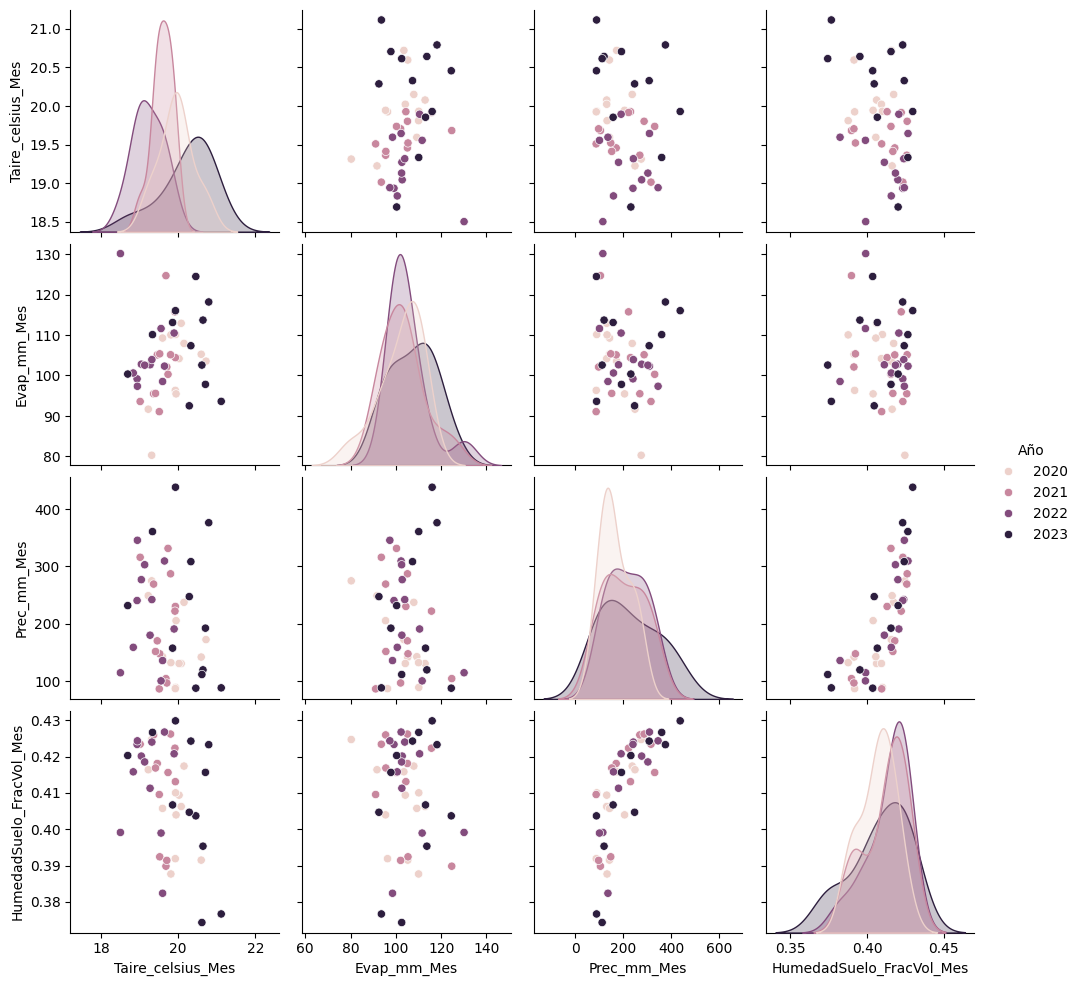

In [165]:
sns.pairplot(SantanderFinalvisible,hue='Año',vars=['Taire_celsius_Mes', 'Evap_mm_Mes', 'Prec_mm_Mes', 'HumedadSuelo_FracVol_Mes'])
plt.savefig("Pair Plot de Variables Climáticas2.png")
plt.show()

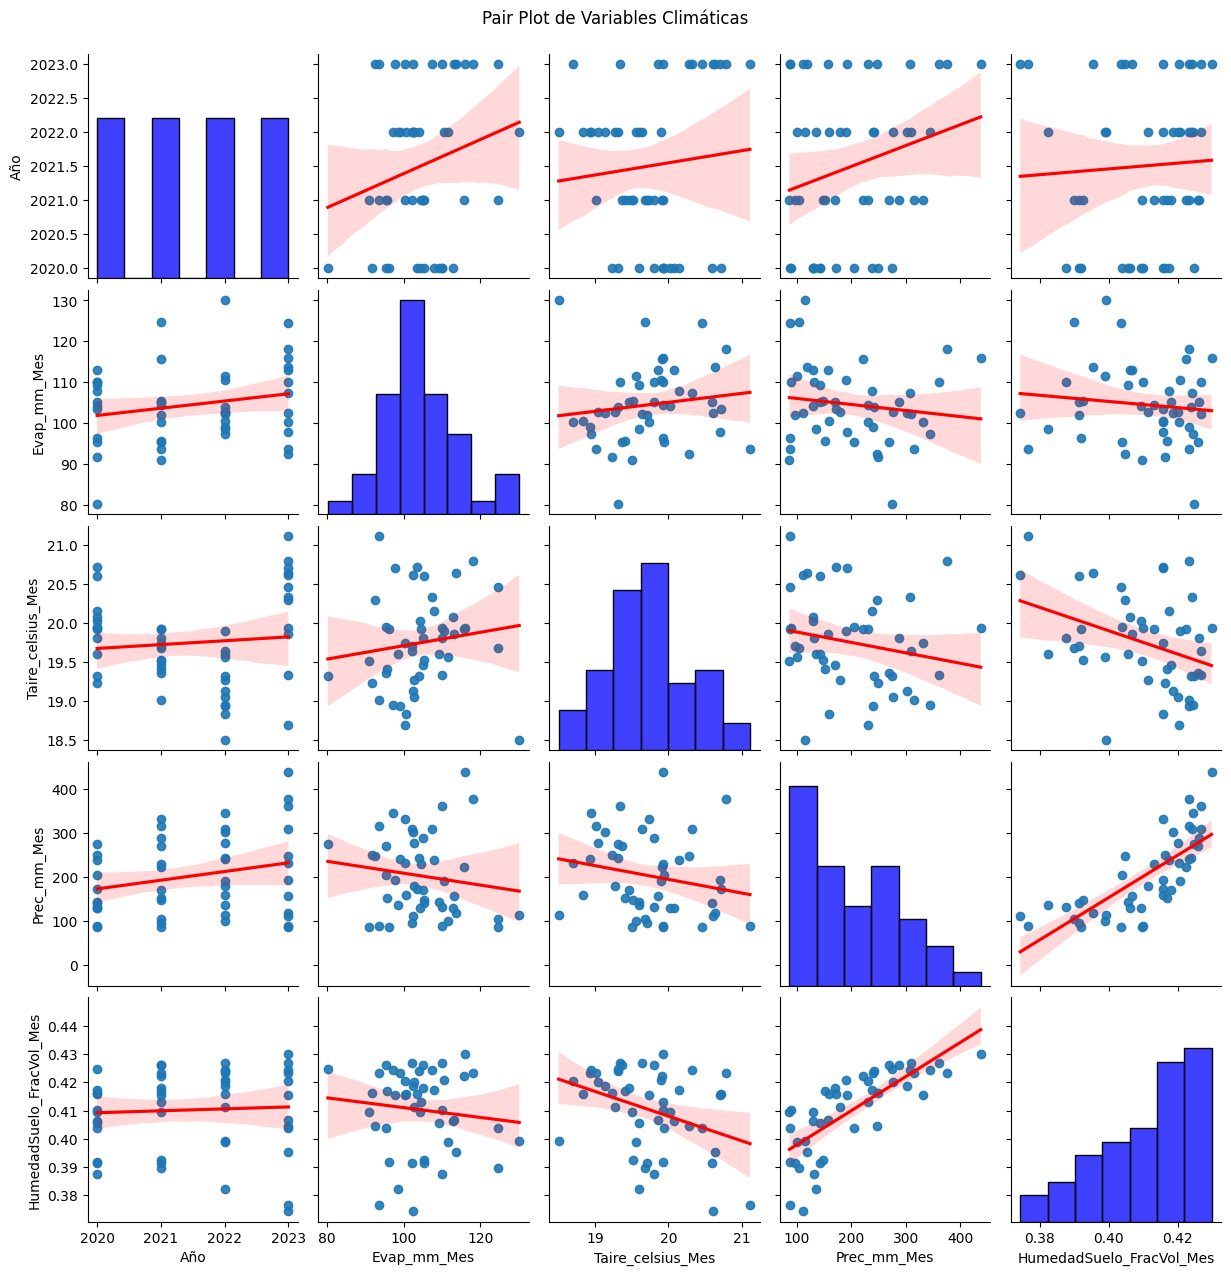

In [145]:
# Seleccionar las columnas deseadas para el pair plot
columns_to_plot = ['Taire_celsius_Mes', 'Evap_mm_Mes', 'Prec_mm_Mes', 'HumedadSuelo_FracVol_Mes']
#grafico con multiples variables
sns.pairplot(SantanderFinalvisible, diag_kws={'color':'blue'},plot_kws={'scatter_kws':{'alpha':0.9},'line_kws':{'color':'red'}},kind='reg')
plt.savefig("Pair Plot de Variables Climáticas.png")
plt.suptitle('Pair Plot de Variables Climáticas', y=1.02)
plt.savefig("Pair Plot de Variables Climáticas.png")
plt.show()

#MAPA DE CALOR MATRIZ DE CORRELACION

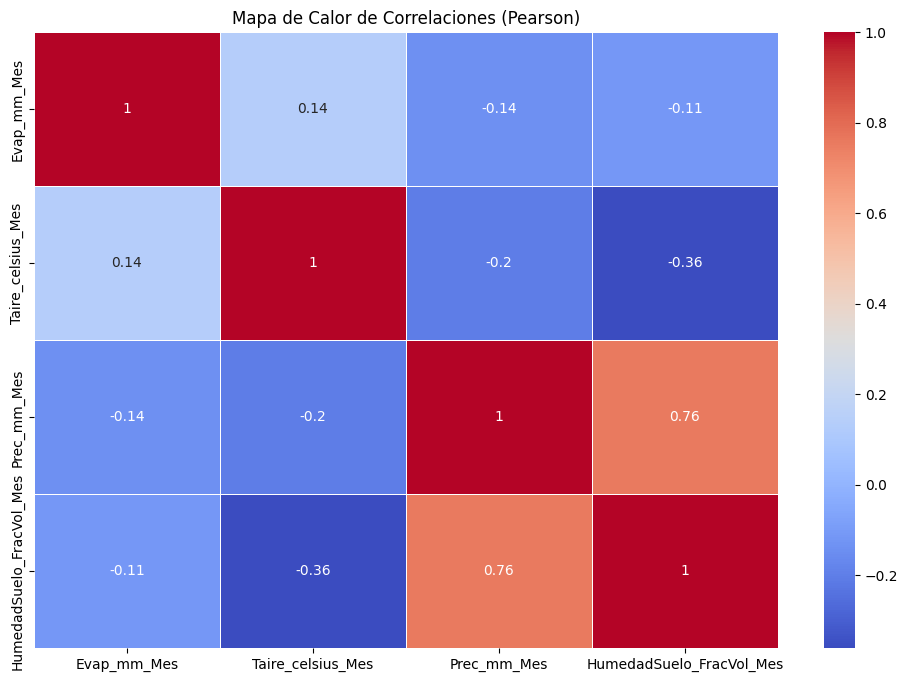

In [93]:
#Matriz correlacion pearson
plt.figure(figsize=(12, 8))
sns.heatmap(corr_p, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones (Pearson)')
plt.savefig("Mapa de Calor de Correlaciones (Pearson).png")

plt.show()

In [150]:
#METODO SPEARMAN
#CORRELACION
columns_for_correlation = [ 'Evap_mm_Mes', 'Prec_mm_Mes', 'Taire_celsius_Mes','HumedadSuelo_FracVol_Mes']
coef = SantanderFinalvisible[columns_for_correlation].corr(method='spearman')
coef


,Evap_mm_Mes,Prec_mm_Mes,Taire_celsius_Mes,HumedadSuelo_FracVol_Mes
Evap_mm_Mes,1.000000,-0.156752,0.272688,-0.089883
Prec_mm_Mes,-0.156752,1.000000,-0.254776,0.825988
Taire_celsius_Mes,0.272688,-0.254776,1.000000,-0.344659
HumedadSuelo_FracVol_Mes,-0.089883,0.825988,-0.344659,1.000000


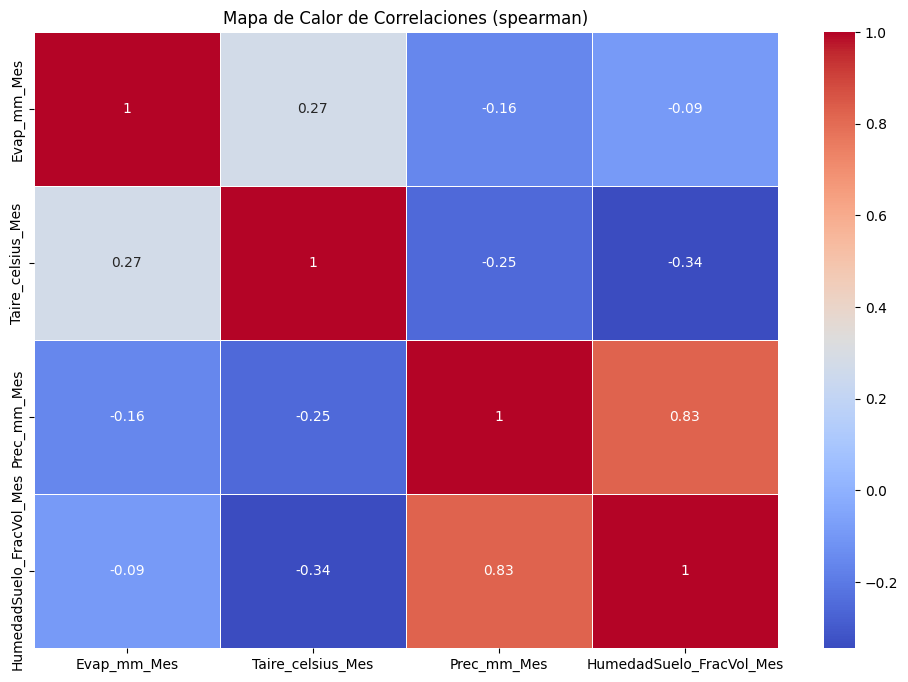

In [166]:
#Matriz correlacion spearman
plt.figure(figsize=(12, 8))
sns.heatmap(corr_s, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones (spearman)')
plt.savefig("Mapa de Calor de Correlaciones (spearman).png")

plt.show()

,Evap_mm_Mes,Prec_mm_Mes,Taire_celsius_Mes,HumedadSuelo_FracVol_Mes
Evap_mm_Mes,1.000000,-0.141110,0.137132,-0.114547
Prec_mm_Mes,-0.141110,1.000000,-0.203105,0.759479
Taire_celsius_Mes,0.137132,-0.203105,1.000000,-0.361479
HumedadSuelo_FracVol_Mes,-0.114547,0.759479,-0.361479,1.000000


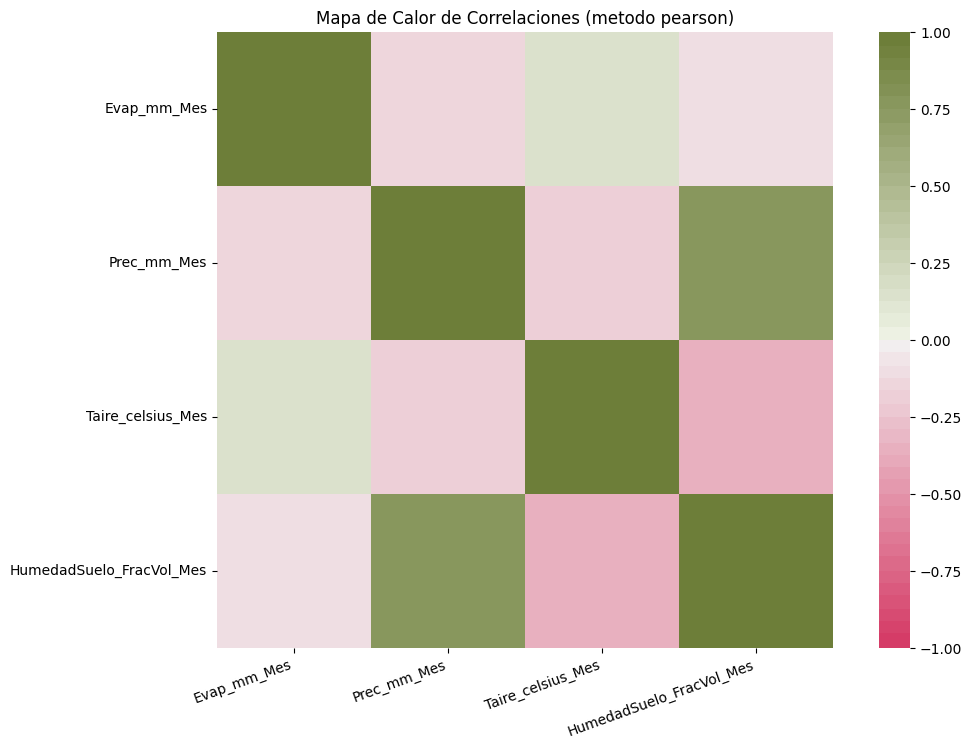

In [228]:
#correlacion prueba pearson
plt.figure(figsize=(12, 8))
plt.title('Mapa de Calor de Correlaciones (metodo pearson)')
SantanderFinalvisible_new=SantanderFinalvisible[['Evap_mm_Mes', 'Prec_mm_Mes', 'Taire_celsius_Mes','HumedadSuelo_FracVol_Mes']]
corr_new=SantanderFinalvisible_new.corr(method='pearson')
corr_new
ax=sns.heatmap(corr_new,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(1,100,n=48),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,horizontalalignment='right')
plt.savefig("Mapa de Calor de Correlaciones (prueba pearson).png")
corr_new

,Evap_mm_Mes,Prec_mm_Mes,Taire_celsius_Mes,HumedadSuelo_FracVol_Mes
Evap_mm_Mes,1.000000,-0.156752,0.272688,-0.089883
Prec_mm_Mes,-0.156752,1.000000,-0.254776,0.825988
Taire_celsius_Mes,0.272688,-0.254776,1.000000,-0.344659
HumedadSuelo_FracVol_Mes,-0.089883,0.825988,-0.344659,1.000000


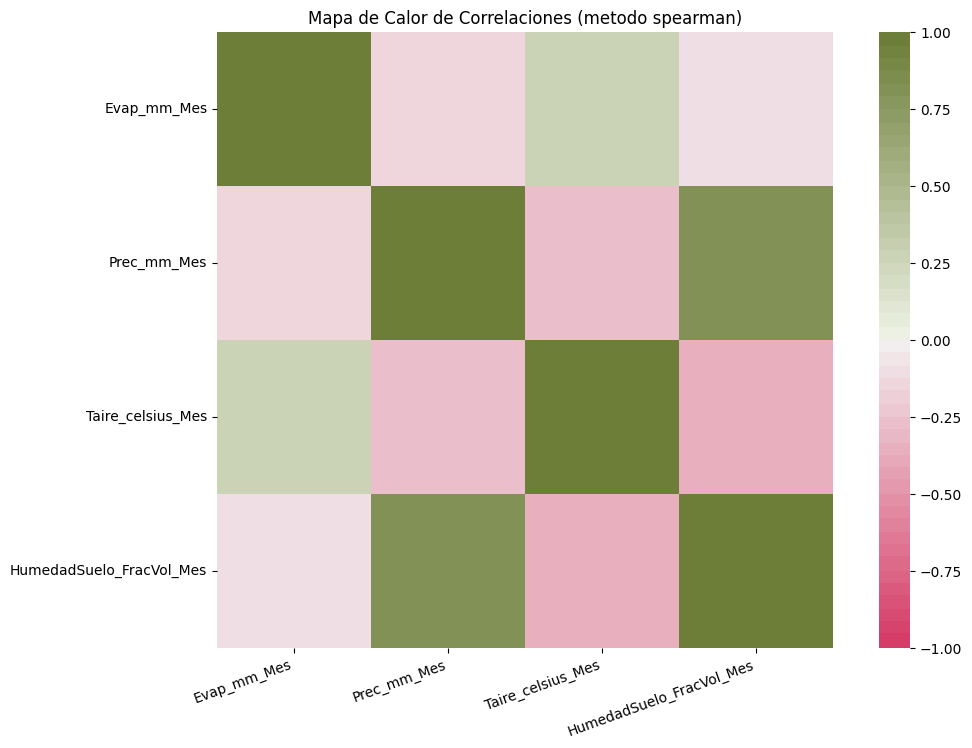

In [229]:
#correlacion prueba
plt.figure(figsize=(12, 8))
plt.title('Mapa de Calor de Correlaciones (metodo spearman)')
SantanderFinalvisible_new=SantanderFinalvisible[['Evap_mm_Mes', 'Prec_mm_Mes', 'Taire_celsius_Mes','HumedadSuelo_FracVol_Mes']]
corr_new=SantanderFinalvisible_new.corr(method='spearman')
corr_new
ax=sns.heatmap(corr_new,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(1,100,n=48),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,horizontalalignment='right')
plt.savefig("Mapa de Calor de Correlaciones (prueba spearman).png")
corr_new

In [167]:
SantanderFinalvisible

,x,y,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Fecha,Año,Mes,Día,Pais,Dpto,Mpio
1898,-76.469164,3.087996,112.900772,20.077869,130.572881,0.406248,2020-01-01,2020,1,1,Colombia,Cauca,Santander de Quilichao
1899,-76.469164,3.087996,105.246336,20.596423,141.882114,0.391496,2020-02-01,2020,2,1,Colombia,Cauca,Santander de Quilichao
1900,-76.469164,3.087996,104.162918,20.022906,130.661388,0.409376,2020-03-01,2020,3,1,Colombia,Cauca,Santander de Quilichao
1901,-76.469164,3.087996,107.924769,20.150500,237.297521,0.417379,2020-04-01,2020,4,1,Colombia,Cauca,Santander de Quilichao
1902,-76.469164,3.087996,103.536686,20.720721,172.356582,0.415807,2020-05-01,2020,5,1,Colombia,Cauca,Santander de Quilichao
1903,-76.469164,3.087996,110.121366,19.932117,88.911312,0.410018,2020-06-01,2020,6,1,Colombia,Cauca,Santander de Quilichao
1904,-76.469164,3.087996,109.249360,19.594348,142.535211,0.405733,2020-07-01,2020,7,1,Colombia,Cauca,Santander de Quilichao
1905,-76.469164,3.087996,110.034076,19.810474,132.117070,0.387678,2020-08-01,2020,8,1,Colombia,Cauca,Santander de Quilichao
1906,-76.469164,3.087996,96.320313,19.925037,86.853246,0.391893,2020-09-01,2020,9,1,Colombia,Cauca,Santander de Quilichao
1907,-76.469164,3.087996,95.454210,19.944720,205.348256,0.403949,2020-10-01,2020,10,1,Colombia,Cauca,Santander de Quilichao


#Exploracion graficos linealaes de tendencias

               x             y  Evap_mm_Mes  Taire_celsius_Mes  Prec_mm_Mes  \
count  48.000000  4.800000e+01    48.000000          48.000000    48.000000   
mean  -76.469164  3.087996e+00   104.523516          19.745409   202.495365   
min   -76.469164  3.087996e+00    80.284143          18.502368    86.404376   
25%   -76.469164  3.087996e+00    98.336371          19.329692   130.639261   
50%   -76.469164  3.087996e+00   103.727570          19.720615   185.412741   
75%   -76.469164  3.087996e+00   110.105800          20.036647   270.519872   
max   -76.469164  3.087996e+00   130.121833          21.115100   437.955304   
std     0.000000  4.487887e-16     9.476087           0.594860    90.535621   

       HumedadSuelo_FracVol_Mes                Fecha          Año        Mes  \
count                 48.000000                   48    48.000000  48.000000   
mean                   0.410247  2021-12-15 23:00:00  2021.500000   6.500000   
min                    0.374325  2020-01-01 00:0

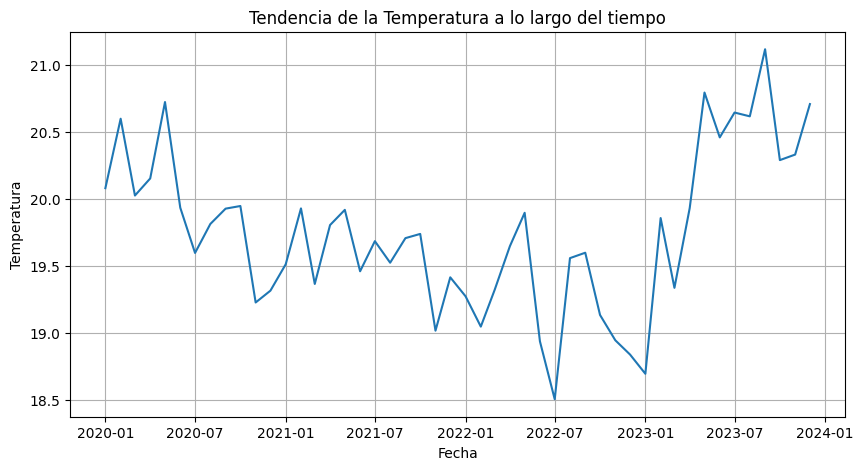

In [168]:
#grafica de tendencia temperatura
print(SantanderFinalvisible.describe())

# Visualización de la tendencia de temperatura a lo largo del tiempo
plt.figure(figsize=(10, 5))
plt.plot(SantanderFinalvisible['Fecha'], SantanderFinalvisible['Taire_celsius_Mes'])
plt.title('Tendencia de la Temperatura a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.grid(True)
plt.savefig("Tendencia de la Temperatura a lo largo del tiempo.png")
plt.show()

               x             y  Evap_mm_Mes  Taire_celsius_Mes  Prec_mm_Mes  \
count  48.000000  4.800000e+01    48.000000          48.000000    48.000000   
mean  -76.469164  3.087996e+00   104.523516          19.745409   202.495365   
min   -76.469164  3.087996e+00    80.284143          18.502368    86.404376   
25%   -76.469164  3.087996e+00    98.336371          19.329692   130.639261   
50%   -76.469164  3.087996e+00   103.727570          19.720615   185.412741   
75%   -76.469164  3.087996e+00   110.105800          20.036647   270.519872   
max   -76.469164  3.087996e+00   130.121833          21.115100   437.955304   
std     0.000000  4.487887e-16     9.476087           0.594860    90.535621   

       HumedadSuelo_FracVol_Mes                Fecha          Año        Mes  \
count                 48.000000                   48    48.000000  48.000000   
mean                   0.410247  2021-12-15 23:00:00  2021.500000   6.500000   
min                    0.374325  2020-01-01 00:0

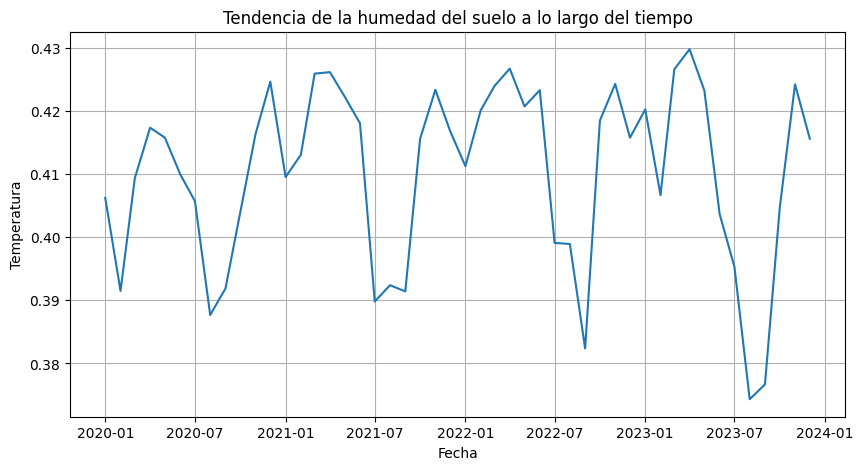

In [169]:
#grafica de tendencia temperatura
print(SantanderFinalvisible.describe())

# Visualización de la tendencia de temperatura a lo largo del tiempo
plt.figure(figsize=(10, 5))
plt.plot(SantanderFinalvisible['Fecha'], SantanderFinalvisible['HumedadSuelo_FracVol_Mes'])
plt.title('Tendencia de la humedad del suelo a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.grid(True)
plt.savefig("Tendencia de la humedad a lo largo del tiempo.png")
plt.show()

#GRAFICOS LINEALES DE CORRELACION

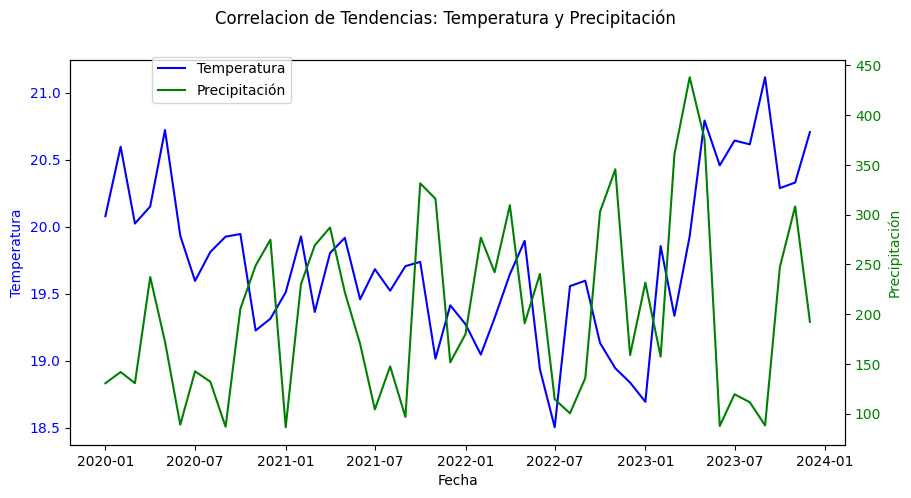

<Figure size 1000x500 with 0 Axes>

In [170]:
# Asegurarse de que la columna de fecha esté en formato datetime y sea el índice
SantanderFinalvisible['fecha'] = pd.to_datetime(SantanderFinalvisible['Fecha'])
SantanderFinalvisible.set_index('fecha', inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 5))
# Graficar la primera variable (temperatura) en el eje Y principal
ax1.plot(SantanderFinalvisible.index, SantanderFinalvisible['Taire_celsius_Mes'], 'b-', label='Temperatura')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Temperatura', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y para la segunda variable (precipitación)
plt.figure(figsize=(10, 5))
ax2 = ax1.twinx()
ax2.plot(SantanderFinalvisible.index, SantanderFinalvisible['Prec_mm_Mes'], 'g-', label='Precipitación')
ax2.set_ylabel('Precipitación', color='g')
ax2.tick_params(axis='y', labelcolor='g')
fig.suptitle('Correlacion de Tendencias: Temperatura y Precipitación')
fig.legend(loc="upper left", bbox_to_anchor=(0.2,0.9))
fig.savefig("Correlacion de Tendencias Temperatura y Precipitación.png")
plt.show()







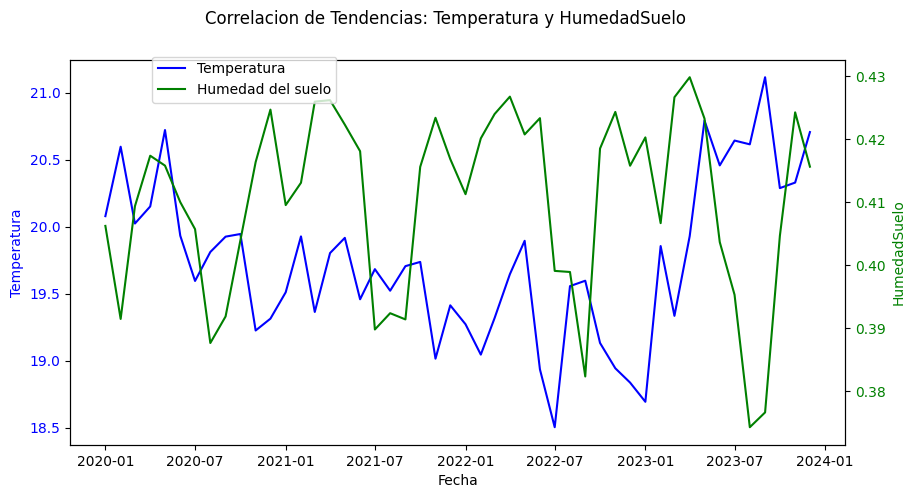

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Asegurarse de que la columna de fecha esté en formato datetime y sea el índice
SantanderFinalvisible['fecha'] = pd.to_datetime(SantanderFinalvisible['Fecha'])
SantanderFinalvisible.set_index('fecha', inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 5))
# Graficar la primera variable (temperatura) en el eje Y principal
ax1.plot(SantanderFinalvisible.index, SantanderFinalvisible['Taire_celsius_Mes'], 'b-', label='Temperatura')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Temperatura', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y para la segunda variable (precipitación)
plt.figure(figsize=(10, 5))
ax2 = ax1.twinx()
ax2.plot(SantanderFinalvisible.index, SantanderFinalvisible['HumedadSuelo_FracVol_Mes'], 'g-', label='Humedad del suelo')
ax2.set_ylabel('HumedadSuelo', color='g')
ax2.tick_params(axis='y', labelcolor='g')
fig.suptitle('Correlacion de Tendencias: Temperatura y HumedadSuelo')
fig.legend(loc="upper left", bbox_to_anchor=(0.2,0.9))
fig.savefig("Correlacion de Tendencias Temperatura y HumedadSuelo.png")
plt.show()

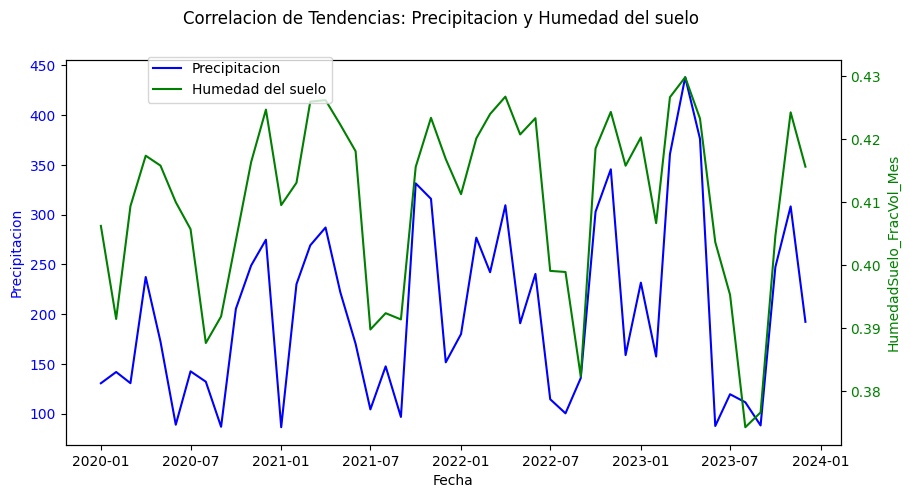

<Figure size 1000x500 with 0 Axes>

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
# Graficar la primera variable (temperatura) en el eje Y principal
ax1.plot(SantanderFinalvisible.index, SantanderFinalvisible['Prec_mm_Mes'], 'b-', label='Precipitacion')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precipitacion', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y para la segunda variable (precipitación)
plt.figure(figsize=(10, 5))
ax2 = ax1.twinx()
ax2.plot(SantanderFinalvisible.index, SantanderFinalvisible['HumedadSuelo_FracVol_Mes'], 'g-', label='Humedad del suelo')
ax2.set_ylabel('HumedadSuelo_FracVol_Mes', color='g')
ax2.tick_params(axis='y', labelcolor='g')
fig.suptitle('Correlacion de Tendencias: Precipitacion y Humedad del suelo')
fig.legend(loc="upper left", bbox_to_anchor=(0.2,0.9))
fig.savefig("Correlacion de Tendencias Precipitacion y Humedad del suelo.png")
plt.show()

#MATRICES GRAFICAS

In [ ]:
import matplotlib.gridspec as gridspec
from pylab import* # matrices de graficas!!!

In [ ]:
SantanderFinalvisible

,x,y,Evap_mm_Mes,Taire_celsius_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Fecha,Año,Mes,Día,Pais,Dpto,Mpio
fecha,,,,,,,,,,,,,
2020-01-01,-76.469164,3.087996,112.900772,20.077869,130.572881,0.406248,2020-01-01,2020,1,1,Colombia,Cauca,Santander de Quilichao
2020-02-01,-76.469164,3.087996,105.246336,20.596423,141.882114,0.391496,2020-02-01,2020,2,1,Colombia,Cauca,Santander de Quilichao
2020-03-01,-76.469164,3.087996,104.162918,20.022906,130.661388,0.409376,2020-03-01,2020,3,1,Colombia,Cauca,Santander de Quilichao
2020-04-01,-76.469164,3.087996,107.924769,20.150500,237.297521,0.417379,2020-04-01,2020,4,1,Colombia,Cauca,Santander de Quilichao
2020-05-01,-76.469164,3.087996,103.536686,20.720721,172.356582,0.415807,2020-05-01,2020,5,1,Colombia,Cauca,Santander de Quilichao
2020-06-01,-76.469164,3.087996,110.121366,19.932117,88.911312,0.410018,2020-06-01,2020,6,1,Colombia,Cauca,Santander de Quilichao
2020-07-01,-76.469164,3.087996,109.249360,19.594348,142.535211,0.405733,2020-07-01,2020,7,1,Colombia,Cauca,Santander de Quilichao
2020-08-01,-76.469164,3.087996,110.034076,19.810474,132.117070,0.387678,2020-08-01,2020,8,1,Colombia,Cauca,Santander de Quilichao
2020-09-01,-76.469164,3.087996,96.320313,19.925037,86.853246,0.391893,2020-09-01,2020,9,1,Colombia,Cauca,Santander de Quilichao


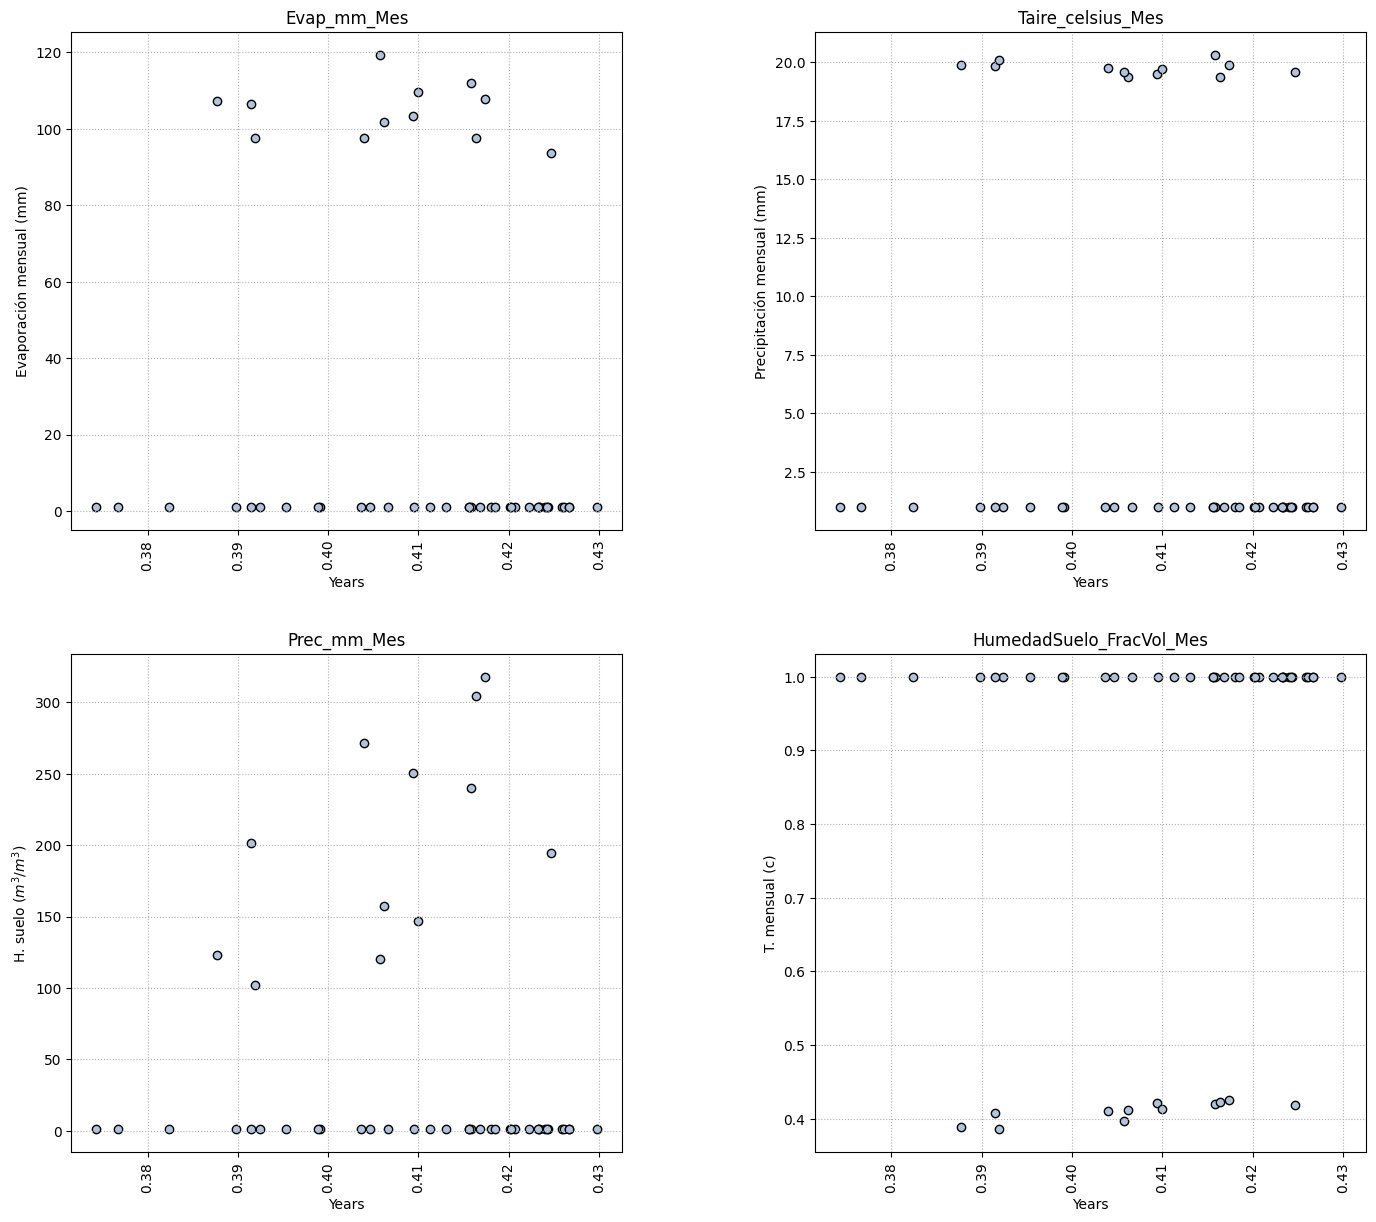

In [ ]:
mat_me = np.ones([4,48]) #Creamos una matriz de unos con 4 filas que corresponden a las variables y 12 columnas que corresponden a los meses
meses = np.arange(1,13) #Creamos una enumeración de los meses

for i,mes in enumerate(meses):
    z = SantanderFinalvisible[SantanderFinalvisible.Mes == mes] #Filtramos los datos mes por mes, el iterador es "mes"
    for j,sta in enumerate(SantanderFinalvisible.columns[2:6]): #Estimamos el promedio de cada variable mes por mes
        zl = z[sta].mean()
        mat_me[j,i] = zl #Cada valor promedio mensual de cada variable y cada mes se reasigna a la matriz

fig = plt.figure(figsize=(14,14)) #tamaño de la figura
gs = gridspec.GridSpec(2,2, left=0.05, right=0.975, hspace=0.25, wspace=0.35, top=0.9, bottom=0.1) #Dimensiones de la figura
# Use a list to select multiple columns
Nombres = SantanderFinalvisible[['Evap_mm_Mes', 'Taire_celsius_Mes',    'Prec_mm_Mes'   ,'HumedadSuelo_FracVol_Mes']].columns #Nombres de cada variable para poner al titulo, extraemos los nombres de las columnas
Etiquetas = ["Evaporación mensual (mm)", "Precipitación mensual (mm)", "H. suelo ($m^3/m^3$)", "T. mensual (c)"] #Etiquetas del eje y para cada gráfica
for i in range (4):
    ax = subplot (gs[i])
    plt.xlabel("Years")
    plt.xticks(rotation=90)
    plt.grid(linestyle=":")
    plt.ylabel(Etiquetas[i])
    plt.title(Nombres[i]) # Usamos el índice para acceder al nombre de la columna correspondiente
    plt.scatter(SantanderFinalvisible.HumedadSuelo_FracVol_Mes,np.nan_to_num(mat_me[i,:]), color = 'lightsteelblue', edgecolor ='k')
    plt.savefig("boxplot_dispersion.png")

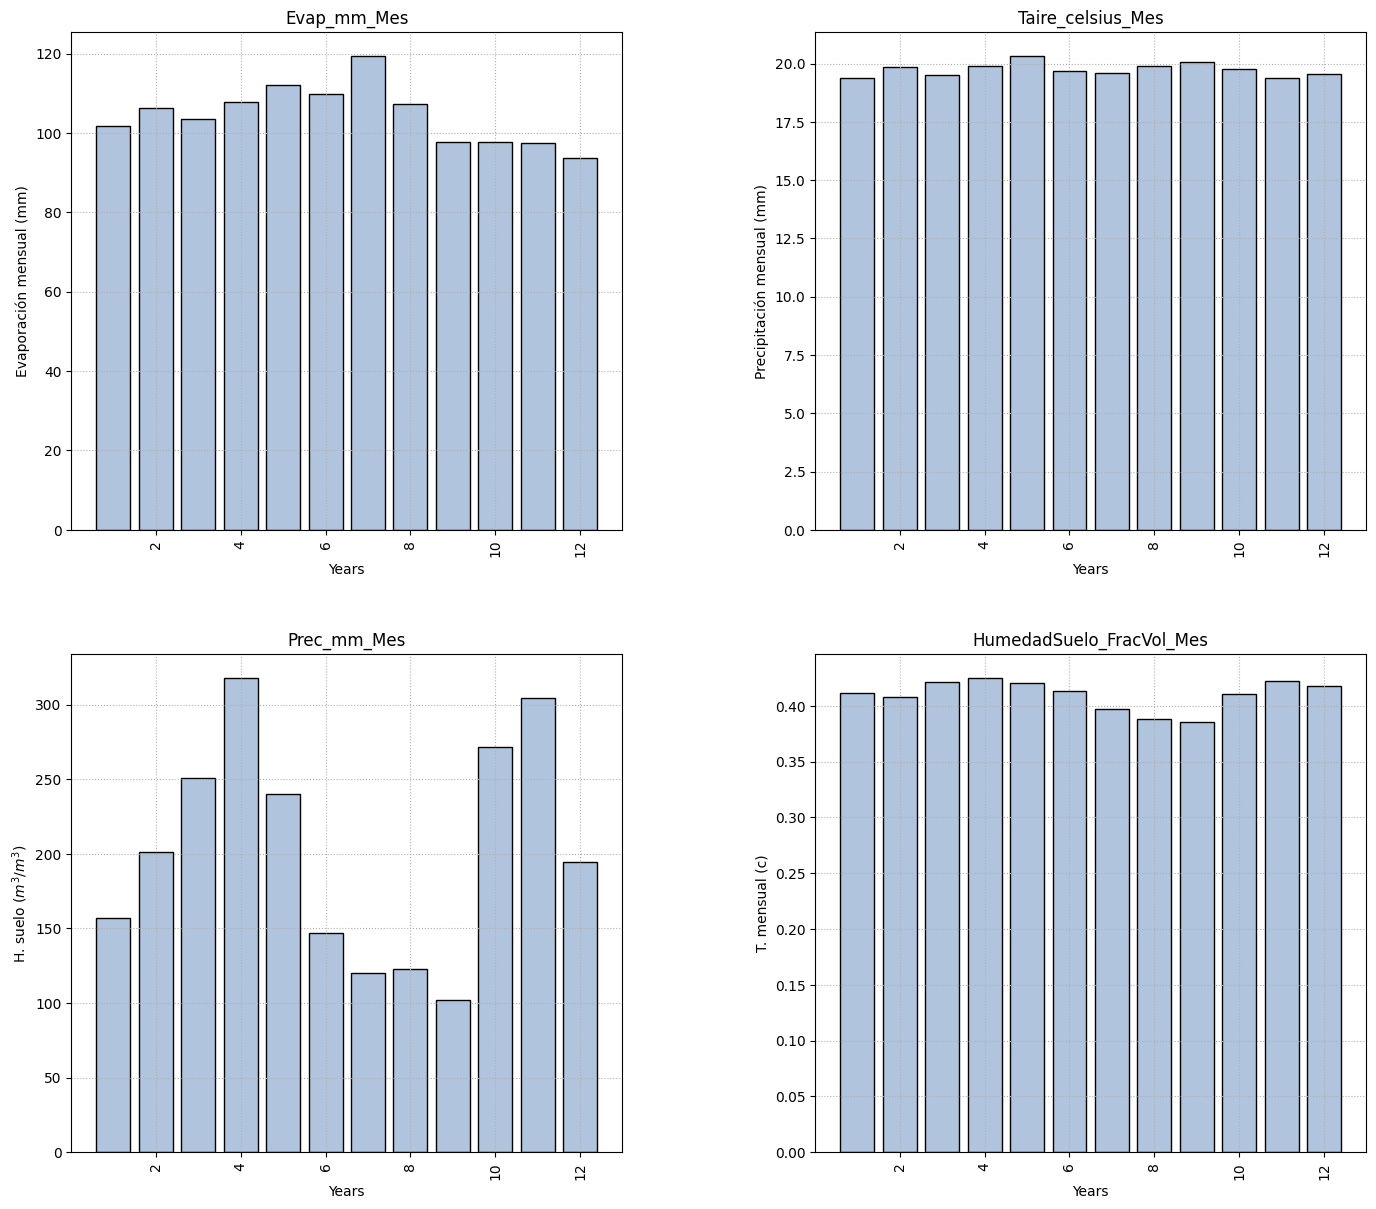

In [ ]:
mat_me = np.ones([4,12]) #Creamos una matriz de unos con 4 filas que corresponden a las variables y 12 columnas que corresponden a los meses
meses = np.arange(1,13) #Creamos una enumeración de los meses

for i,mes in enumerate(meses):
    z = SantanderFinalvisible[SantanderFinalvisible.Mes == mes] #Filtramos los datos mes por mes, el iterador es "mes"
    for j,sta in enumerate(SantanderFinalvisible.columns[2:6]): #Estimamos el promedio de cada variable mes por mes
        zl = z[sta].mean()
        mat_me[j,i] = zl #Cada valor promedio mensual de cada variable y cada mes se reasigna a la matriz

fig = plt.figure(figsize=(14,14)) #tamaño de la figura
gs = gridspec.GridSpec(2,2, left=0.05, right=0.975, hspace=0.25, wspace=0.35, top=0.9, bottom=0.1) #Dimensiones de la figura
Nombres = SantanderFinalvisible.columns[2:6] #Nombres de cada variable para poner al titulo
Etiquetas = ["Evaporación mensual (mm)", "Precipitación mensual (mm)", "H. suelo ($m^3/m^3$)", "T. mensual (c)"] #Etiquetas del eje y para cada gráfica
for i in range (4):
    ax = subplot (gs[i])
    plt.xlabel("Years")
    plt.xticks(rotation=90)
    plt.grid(linestyle=":")
    plt.ylabel(Etiquetas[i])
    plt.title(Nombres[i])
    plt.bar(meses,np.nan_to_num(mat_me[i,:]), color = 'lightsteelblue', edgecolor ='k')
    plt.savefig("boxplot_barras.png")

#Arreglos multidimensionales

In [172]:
# Filtrar los datos para el municipio de Santander de Quilichao
SantanderFinalvisible = Datosclima[Datosclima['Mpio'] == 'Santander de Quilichao']

# Crear un GeoDataFrame con los datos filtrados
SantanderFinalvisiblegdf = gpd.GeoDataFrame(
    SantanderFinalvisible,
    geometry=gpd.points_from_xy(SantanderFinalvisible.x, SantanderFinalvisible.y),
    crs="EPSG:4326"
)

# Mostrar las primeras filas del GeoDataFrame
SantanderFinalvisiblegdf.head()

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio,geometry
1891,-76.469164,3.087996,116.687357,135.102928,0.416058,293.517975,2019-06-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1892,-76.469164,3.087996,109.520868,62.584679,0.389036,293.298126,2019-07-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1893,-76.469164,3.087996,96.731059,15.315375,0.338251,293.652405,2019-08-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1894,-76.469164,3.087996,79.941517,166.244647,0.348640,293.465790,2019-09-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)
1895,-76.469164,3.087996,84.820489,206.072660,0.405706,292.530579,2019-10-01,Colombia,Cauca,Santander de Quilichao,POINT (-76.46916 3.08800)


In [ ]:
#centroides
SantanderFinalvisiblegdf.insert(11, "centroides" ,Santander_Quilichao_Datosclimagdf.centroid)

<ipython-input-105-a668394fec04>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  SantanderFinalvisiblegdf.insert(11, "centroides" ,Santander_Quilichao_Datosclimagdf.centroid)


In [173]:
latitudes = np.array(np.unique(SantanderFinalvisiblegdf.y))
latitudes

array([3.08799626])

In [174]:
longitudes = np.array(np.unique(SantanderFinalvisiblegdf.x))
longitudes

array([-76.4691635])

In [198]:
SantanderFinalvisible

,x,y,Evap_mm_Mes,Prec_mm_Mes,HumedadSuelo_FracVol_Mes,Taire_Kelvin_Mes,Fecha,Pais,Dpto,Mpio
1891,-76.469164,3.087996,116.687357,135.102928,0.416058,293.517975,2019-06-01,Colombia,Cauca,Santander de Quilichao
1892,-76.469164,3.087996,109.520868,62.584679,0.389036,293.298126,2019-07-01,Colombia,Cauca,Santander de Quilichao
1893,-76.469164,3.087996,96.731059,15.315375,0.338251,293.652405,2019-08-01,Colombia,Cauca,Santander de Quilichao
1894,-76.469164,3.087996,79.941517,166.244647,0.348640,293.465790,2019-09-01,Colombia,Cauca,Santander de Quilichao
1895,-76.469164,3.087996,84.820489,206.072660,0.405706,292.530579,2019-10-01,Colombia,Cauca,Santander de Quilichao
...,...,...,...,...,...,...,...,...,...,...
1947,-76.469164,3.087996,95.671177,106.858560,0.395295,294.236389,2024-02-01,Colombia,Cauca,Santander de Quilichao
1948,-76.469164,3.087996,98.260339,116.573683,0.383853,294.367157,2024-03-01,Colombia,Cauca,Santander de Quilichao
1949,-76.469164,3.087996,108.562109,294.063621,0.414849,294.039429,2024-04-01,Colombia,Cauca,Santander de Quilichao
1950,-76.469164,3.087996,102.599681,267.027029,0.425873,294.245361,2024-05-01,Colombia,Cauca,Santander de Quilichao


In [199]:
fechas = pd.date_range("2020-06-01", periods=48, freq="M")
fechas

DatetimeIndex(['2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31'],
              dtype='datetime64[ns]', freq='M')

In [200]:
precipitacionesSantander = np.array(SantanderFinalvisible.Prec_mm_Mes)
precipitacionesSantander= precipitacionesSantander.reshape(-1,1)
precipitacionesSantander

array([[135.1029278 ],
       [ 62.58467864],
       [ 15.31537549],
       [166.24464747],
       [206.07266016],
       [280.43184872],
       [202.18274463],
       [130.57288108],
       [141.88211365],
       [130.6613877 ],
       [237.29752097],
       [172.35658248],
       [ 88.9113124 ],
       [142.53521059],
       [132.11706968],
       [ 86.85324609],
       [205.34825628],
       [248.85173561],
       [274.76623747],
       [ 86.40437631],
       [230.08935247],
       [269.10441695],
       [287.01043781],
       [221.9706201 ],
       [170.17220613],
       [104.32377784],
       [147.54092612],
       [ 96.70302481],
       [331.33073151],
       [315.82146138],
       [151.59110783],
       [180.00826472],
       [276.81054594],
       [242.06805183],
       [309.36396774],
       [190.81721711],
       [240.41661993],
       [114.51386288],
       [100.36131064],
       [135.78198454],
       [302.82070208],
       [345.4656126 ],
       [158.85652369],
       [231

In [201]:
fechas = pd.date_range("2020-06-01", periods=48, freq="M")
fechas

DatetimeIndex(['2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31'],
              dtype='datetime64[ns]', freq='M')

#HISTOGRAMAS

In [207]:
#Asignar formato de fecha a la variable Fecha
SantanderFinalvisible["Fecha"] = pd.to_datetime(SantanderFinalvisible["Fecha"])

<ipython-input-207-5b283a377b6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SantanderFinalvisible["Fecha"] = pd.to_datetime(SantanderFinalvisible["Fecha"])


In [208]:
SantanderFinalvisible.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1891 to 1951
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   x                         61 non-null     float64       
 1   y                         61 non-null     float64       
 2   Evap_mm_Mes               61 non-null     float64       
 3   Prec_mm_Mes               61 non-null     float64       
 4   HumedadSuelo_FracVol_Mes  61 non-null     float64       
 5   Taire_Kelvin_Mes          61 non-null     float64       
 6   Fecha                     61 non-null     datetime64[ns]
 7   Pais                      61 non-null     object        
 8   Dpto                      61 non-null     object        
 9   Mpio                      61 non-null     object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 7.3+ KB


<ipython-input-127-e7fdb1296e1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SantanderFinalvisible['Fecha'] = pd.to_datetime(SantanderFinalvisible['Fecha'])
<ipython-input-127-e7fdb1296e1b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SantanderFinalvisible['Mes'] = SantanderFinalvisible['Fecha'].dt.month


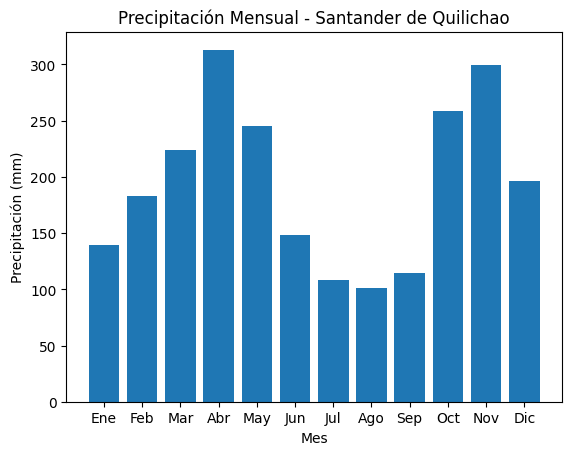

In [ ]:
# Asegúrate de que 'Fecha' esté en formato datetime
SantanderFinalvisible['Fecha'] = pd.to_datetime(SantanderFinalvisible['Fecha'])

# Extrae el mes de la columna 'Fecha'
SantanderFinalvisible['Mes'] = SantanderFinalvisible['Fecha'].dt.month

# Agrupa los datos por mes y suma la precipitación
precipitacion_mensual = SantanderFinalvisible.groupby('Mes')['Prec_mm_Mes'].mean()

# Crea el histograma
plt.bar(precipitacion_mensual.index, precipitacion_mensual.values)
plt.title('Precipitación Mensual - Santander de Quilichao')
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.savefig("histograma_Prec_mm_Mes.png")
plt.show()

<ipython-input-216-3c469e1bf845>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SantanderFinalvisible['Fecha'] = pd.to_datetime(SantanderFinalvisible['Fecha'])


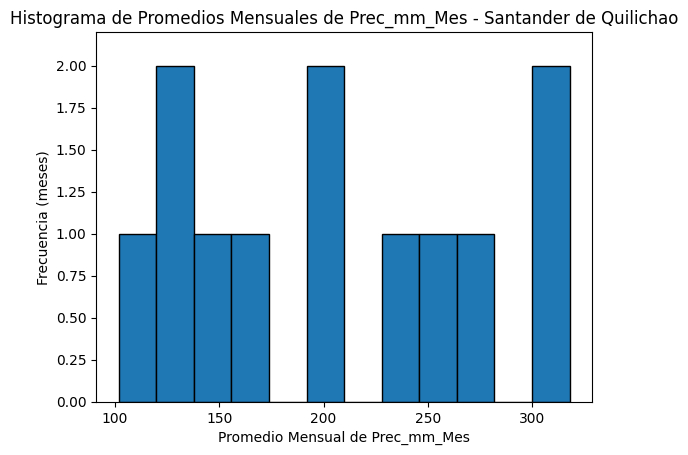

In [216]:
# Asegúrate de que la columna de fecha esté en formato datetime
SantanderFinalvisible['Fecha'] = pd.to_datetime(SantanderFinalvisible['Fecha'])

# Agrupar por mes y calcular el promedio de Prec_mm_Mes
monthly_avg = SantanderFinalvisible.groupby(SantanderFinalvisible['Fecha'].dt.month)['Prec_mm_Mes'].mean()

# Convertir los valores de los promedios mensuales en una lista
monthly_avg_list = monthly_avg.tolist()

# Graficar el histograma con los promedios mensuales
plt.hist(monthly_avg_list, bins=12, edgecolor='black')

# Ajusta el eje Y para que muestre correctamente la frecuencia
max_freq = pd.Series(monthly_avg_list).value_counts(bins=12).max()
plt.ylim(0, max_freq * 1.1)

# Configura el título y las etiquetas
plt.title('Histograma de Promedios Mensuales de Prec_mm_Mes - Santander de Quilichao')
plt.xlabel('Promedio Mensual de Prec_mm_Mes')
plt.ylabel('Frecuencia (meses)')

# Guarda la figura
plt.savefig("histograma_promedios_mensuales_Prec_mm_Mes.png")

# Muestra la figura
plt.show()

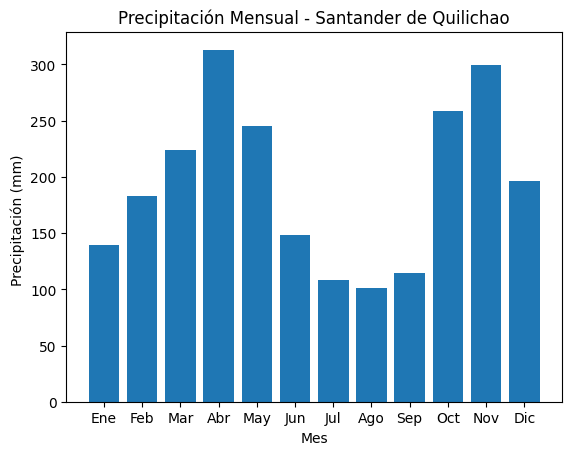

In [ ]:
# Agrupa los datos por mes y calcula la precipitación media mensual
precipitacion_mensual = SantanderFinalvisible.groupby(SantanderFinalvisible['Fecha'].dt.month)['Prec_mm_Mes'].mean()

# Crea el histograma
plt.bar(precipitacion_mensual.index, precipitacion_mensual.values)
plt.title('Precipitación Mensual - Santander de Quilichao')
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm) ')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.savefig("grafico histograma_Prec_mm_Mes.png")
plt.show()

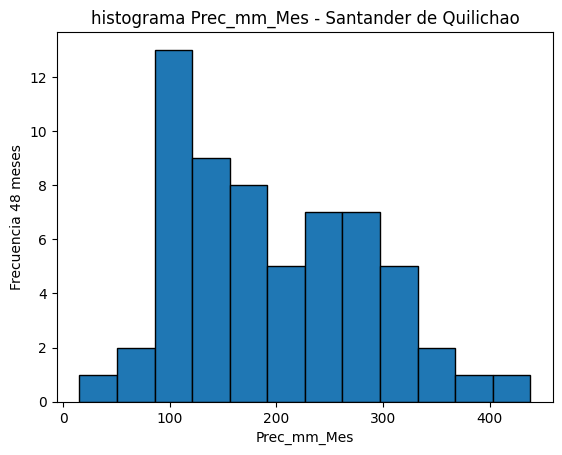

In [ ]:
# Agrupar por mes y calcular el promedio de Prec_mm_Mes
monthly_avg = SantanderFinalvisible.groupby(SantanderFinalvisible['Fecha'].dt.month)['Prec_mm_Mes'].mean()
SantanderFinalvisible.Prec_mm_Mes.plot(kind="hist", bins=12, edgecolor='black')
max_freq = SantanderFinalvisible.Prec_mm_Mes.value_counts(bins=12).max()

plt.title('histograma Prec_mm_Mes - Santander de Quilichao')
plt.xlabel('Prec_mm_Mes')
plt.ylabel('Frecuencia 48 meses')
plt.savefig("histograma 48 meses Prec_mm_Mes.png")


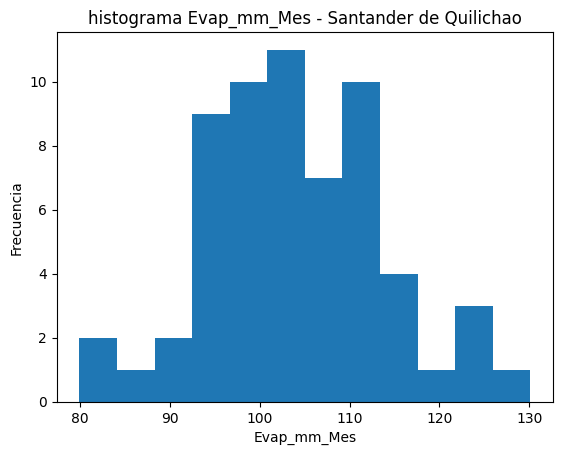

In [ ]:
SantanderFinalvisible.Evap_mm_Mes.plot(kind="hist", bins=12)
plt.title('histograma Evap_mm_Mes - Santander de Quilichao')
plt.xlabel('Evap_mm_Mes')
plt.ylabel('Frecuencia')
plt.savefig("histograma 'Evap_mm_Mes'.png")

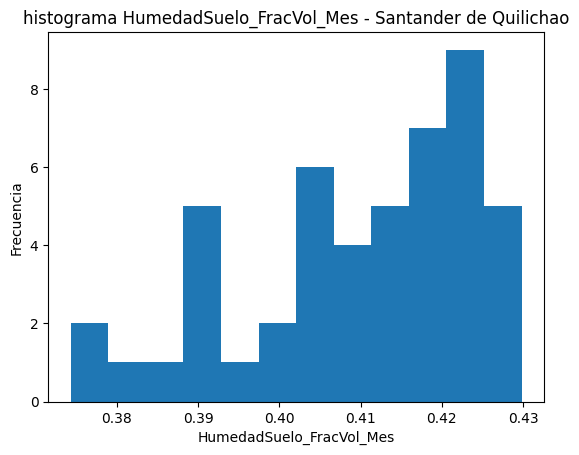

In [214]:
SantanderFinalvisible.HumedadSuelo_FracVol_Mes.plot(kind="hist", bins=12)
plt.title('histograma HumedadSuelo_FracVol_Mes - Santander de Quilichao')
plt.xlabel('HumedadSuelo_FracVol_Mes')
plt.ylabel('Frecuencia')
plt.savefig("histograma 'HumedadSuelo_FracVol_Mes.png")

<Axes: ylabel='Density'>

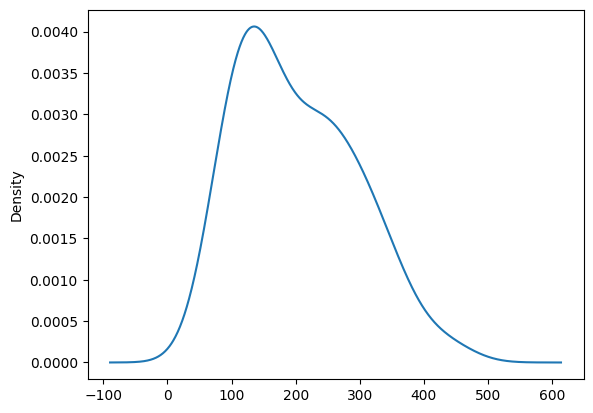

In [213]:
SantanderFinalvisible.Prec_mm_Mes.plot(kind="kde")